Explore [geo pandas mapping example](https://geopandas.org/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py) with novel corona virus data from [John's Hopkins via Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#time_series_covid_19_confirmed_US.csv).

You need to manually download the data because you need a (free) Kaggle account. Download the Kaggle Covid data set and unpack it into the data/ directory containing this notebook.

Make sure to have [geopandas](https://geopandas.org/install.html) installed for base functionality.  The [descartes](https://pypi.python.org/pypi/descartes) package is needed for plotting the map.

In [1]:
!pip install geopandas --user

In [2]:
!pip install descartes --user

Set up the library imports

In [3]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [4]:
rona_df = pd.read_csv("time_series_covid_19_confirmed_US-Copy1.csv")

In [5]:
rona_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,133,133,135,135,136,136,136,136,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,13,13,13,14,14,14,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,903,923,974,1043,1068,1118,1213,1252,1298,1252
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,51,51,51,51,51,53,53,53,53,54


We want to limit our view to the continental United States.  It would be great to have a [bounding box to select just the Latitude and Longitude of interest](https://wiki.openstreetmap.org/wiki/Bounding_Box) but a quick search didn't turn up any numbers to use.  We can get our info by just dropping non-states in the first six rows who have a UID less than 1000 and Alaska and Hawaii from the states. Syntax help from https://stackoverflow.com/a/17071908/8928529.

We can get just state level data for a less granular map by choose the entries with Lat = 0 but this is more complicated to plot since we lose position info. Go ahead and create the data set but ignore it for now. 

In [6]:
rona_cus_df = rona_df.loc[(rona_df['UID']>1000) &
                          (rona_df['Lat'] > 0) &
                          (~rona_df['Province_State'].isin(['Alaska', 'Hawaii']))
                         ]

In [7]:
rona_state_df = rona_df.loc[(rona_df['UID']>1000) & 
                            (rona_df['Lat'] == 0) &
                            (~rona_df['Province_State'].isin(['Alaska', 'Hawaii'])) &
                            (~rona_df['Admin2'].isin(['Unassigned', '']))
                           ]

In [8]:
rona_cus_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19,23,24,26,26,25,26,28,30,32
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,72,87,91,101,103,109,112,117,123,132
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,11,12,14,15,18,20,22,28,29
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,18,22,24,26,28,32,32,34
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14,16,17,18,20,20,21,22,26,29


create the geodata frame for plotting

In [9]:
gdf = geopandas.GeoDataFrame(rona_cus_df,
                             geometry=geopandas.points_from_xy(rona_cus_df.Long_, rona_cus_df.Lat))


In [10]:
gdf


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,geometry
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,23,24,26,26,25,26,28,30,32,POINT (-86.64408227 32.53952745)
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,87,91,101,103,109,112,117,123,132,POINT (-87.72207057999999 30.72774991)
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,11,12,14,15,18,20,22,28,29,POINT (-85.3871286 31.868263)
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,18,22,24,26,28,32,32,34,POINT (-87.12511459999997 32.99642064)
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,16,17,18,20,20,21,22,26,29,POINT (-86.56790592999999 33.98210918)
10,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,8,8,8,8,9,9,11,11,11,POINT (-85.71265535000001 32.10030533)
11,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,8,9,11,16,13,14,14,15,17,POINT (-86.68057478 31.75300095)
12,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,...,62,62,62,63,66,71,80,83,85,POINT (-85.82630386 33.77483727)
13,84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,...,216,221,231,236,240,245,257,259,270,POINT (-85.39072749 32.91360079)
14,84001019,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,...,9,9,11,12,12,12,12,13,13,POINT (-85.60638968000001 34.17805983)


Now plot the location data on the US contentintal map. (This requires the [descartes](https://pypi.python.org/pypi/descartes) module installed above.)

* Source https://www.mikulskibartosz.name/how-to-change-plot-size-in-jupyter-notebook/


In [11]:
plt.rcParams["figure.figsize"] = (20,10)

/home/devink/.local/lib/python3.7/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


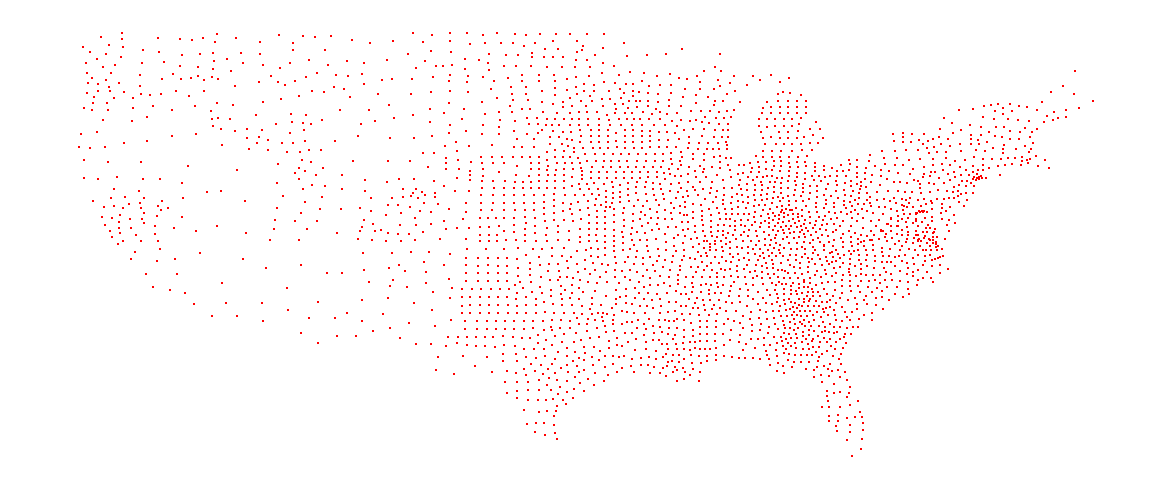

<Figure size 7200x7200 with 0 Axes>

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to United States
ax = world[world.continent == 'United States'].plot(
    color='white', edgecolor='white')

gdf = geopandas.GeoDataFrame(rona_cus_df,
                             geometry=geopandas.points_from_xy(rona_cus_df.Long_, rona_cus_df.Lat))


gdf.plot(ax=ax, color='red', marker='s',markersize=1)
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', marker='s',markersize=1)
plt.axis('off')
plt.figure(figsize=(100,100))
plt.show()


In [62]:
plt.rcParams["figure.figsize"] = (20,10)

# Making it work for one

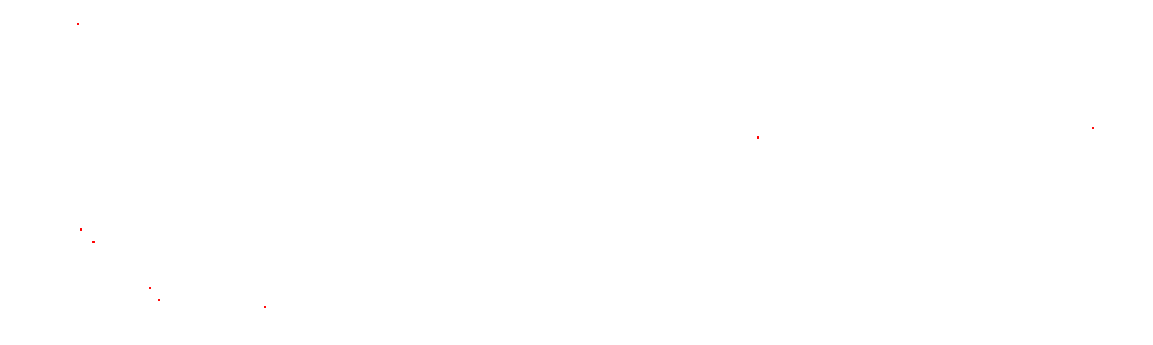

<Figure size 7200x7200 with 0 Axes>

In [85]:
import warnings
warnings.filterwarnings('ignore')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to United States
ax = world[world.continent == 'United States'].plot(
    color='white', edgecolor='white')

col = '2/8/20'
limit_columns = gdf[['Admin2','Province_State','Lat','Long_',col]]
filter_columns = limit_columns[limit_columns[col] != 0]
lat_long = geopandas.GeoDataFrame(filter_columns,geometry=geopandas.points_from_xy(filter_columns.Long_, filter_columns.Lat))
lat_long.plot(ax=ax, color='red', marker='s',markersize=lat_long[col])
plt.axis('off')
plt.savefig('18.png',dpi=100)
plt.figure(figsize=(100,100))
plt.show()



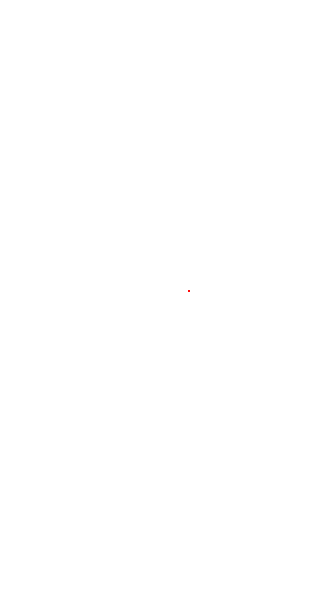

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

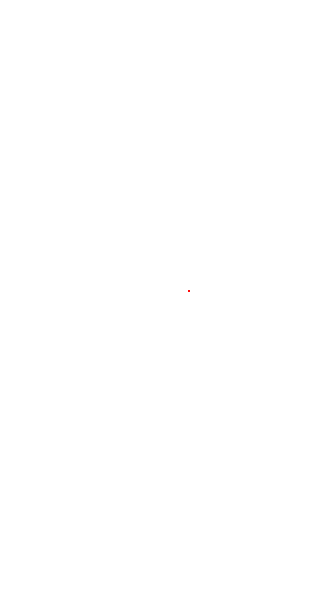

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

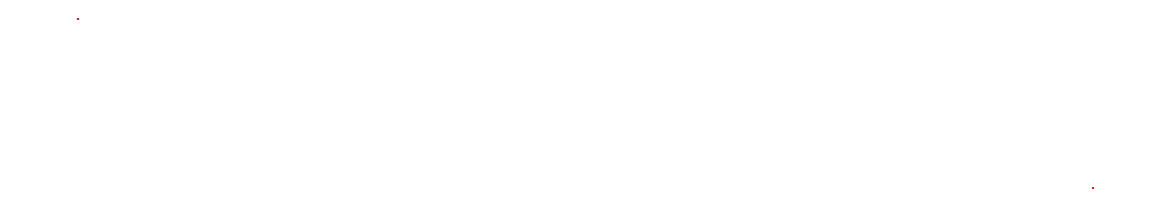

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

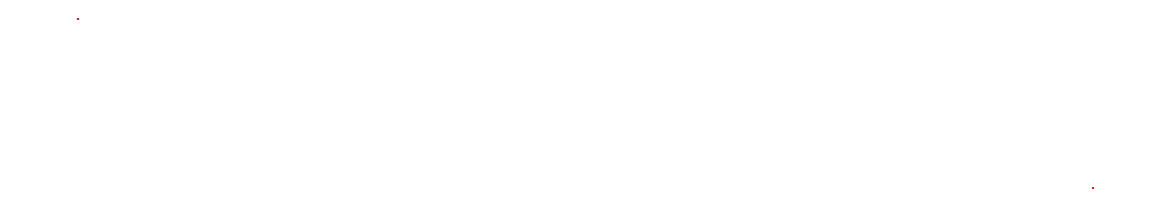

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

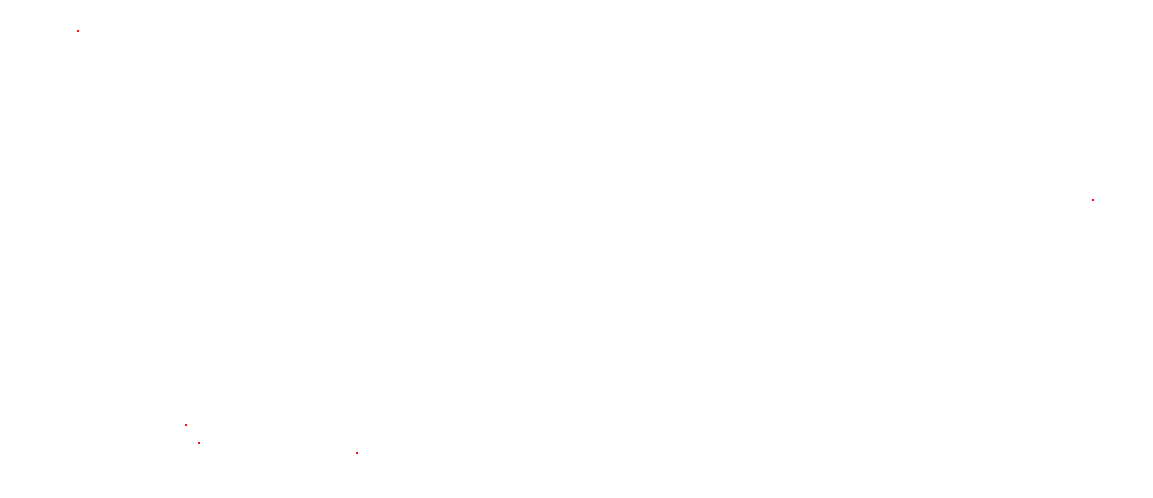

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

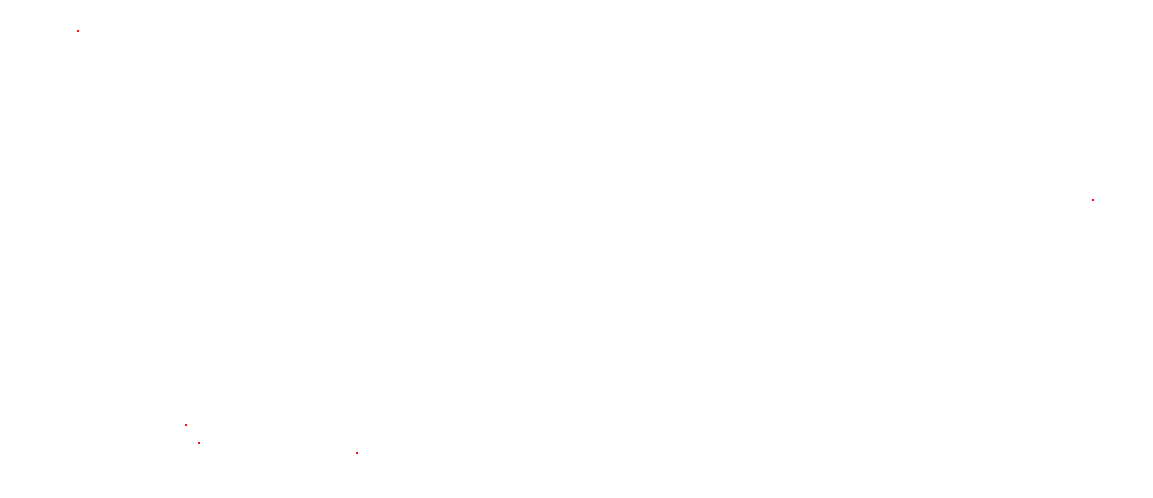

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

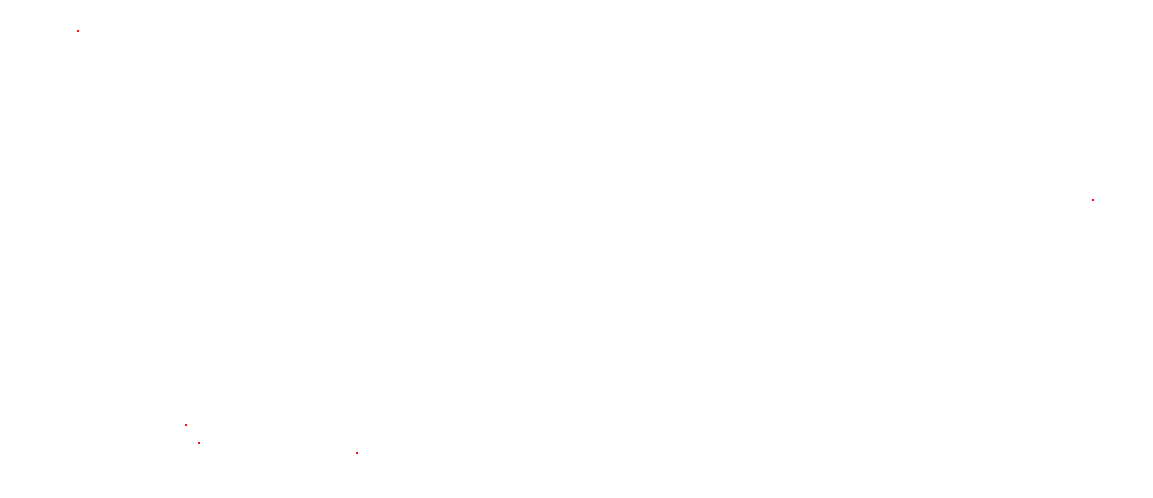

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

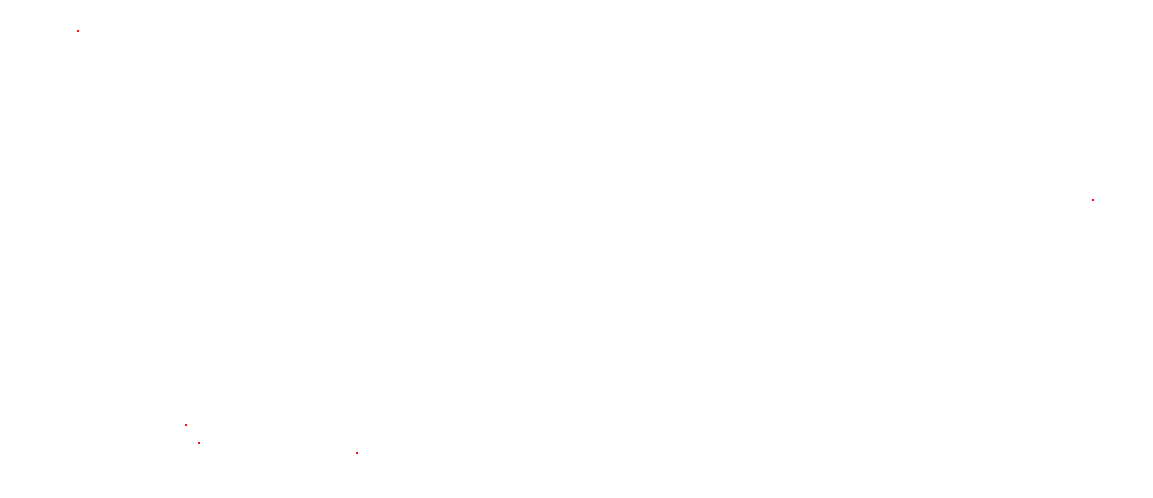

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

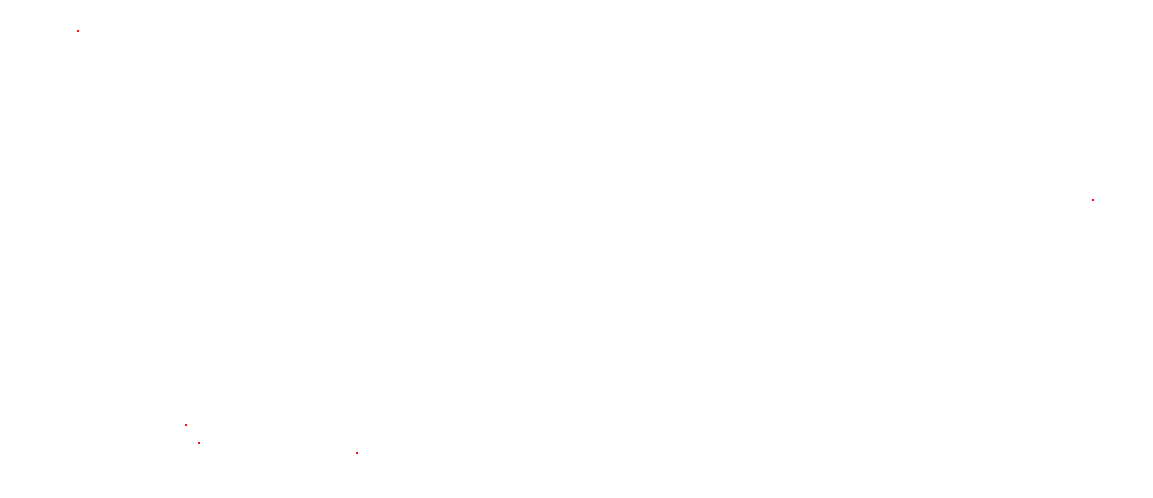

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

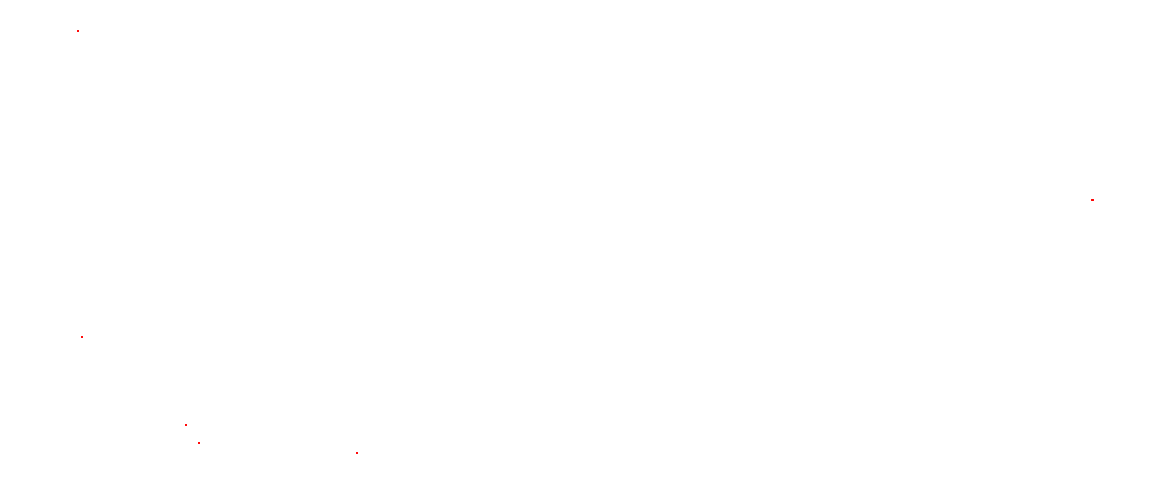

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

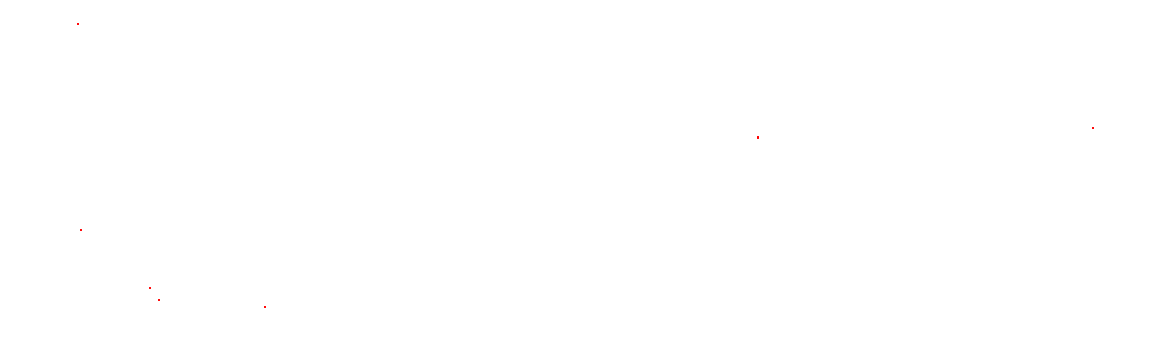

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

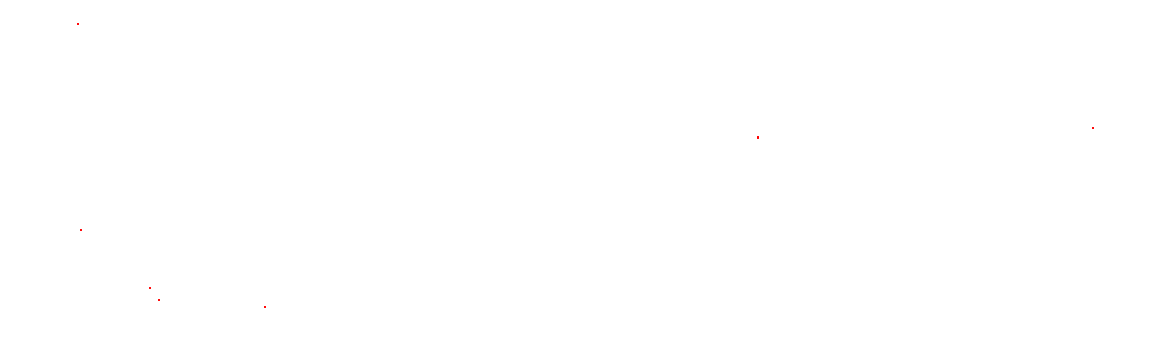

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

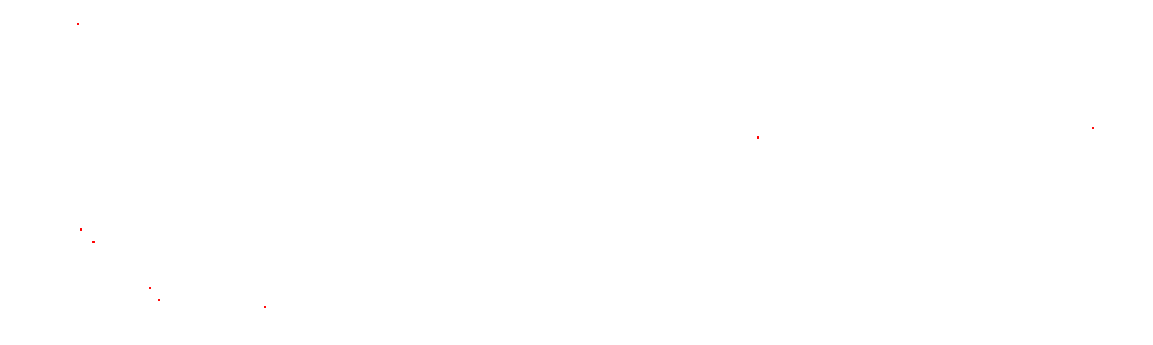

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

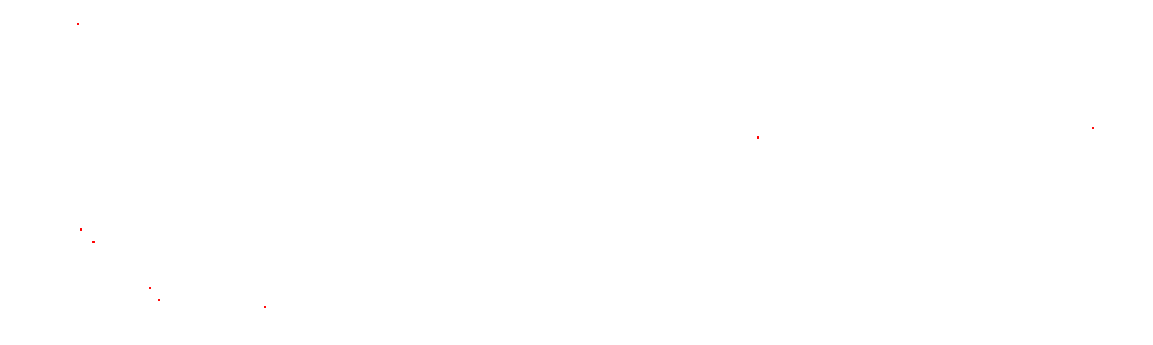

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

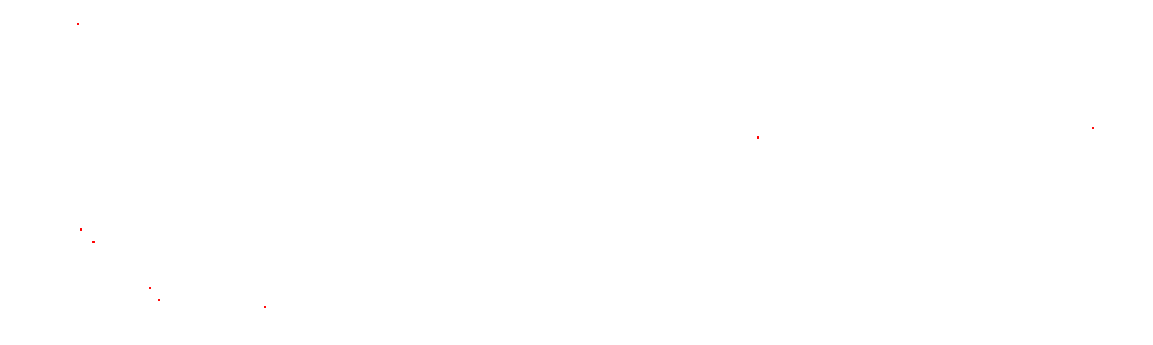

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

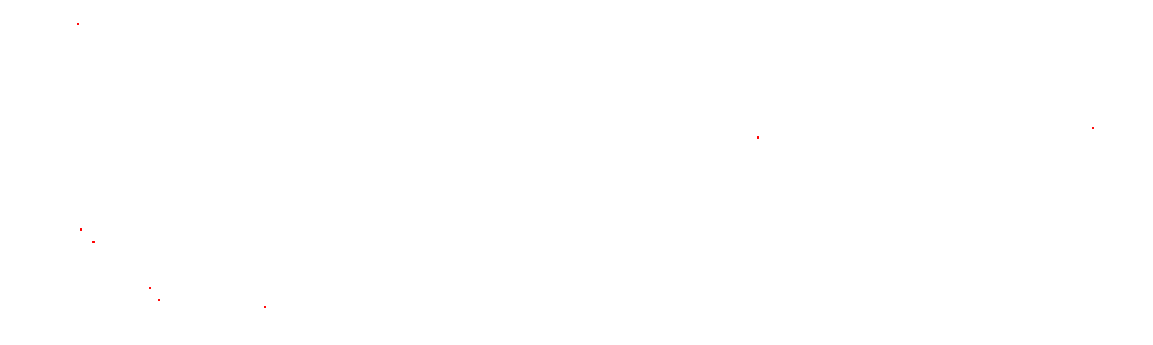

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

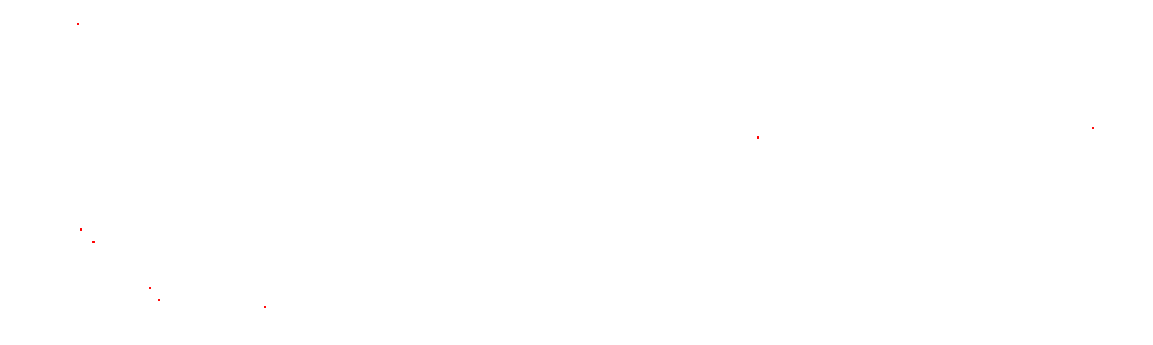

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

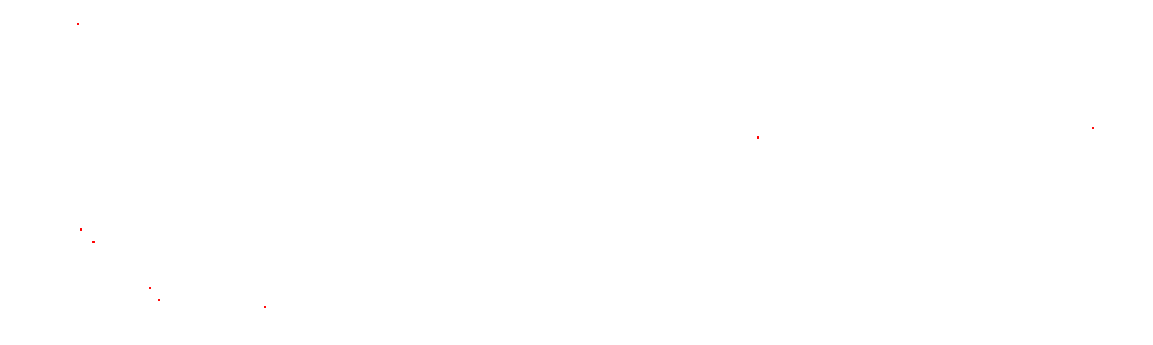

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

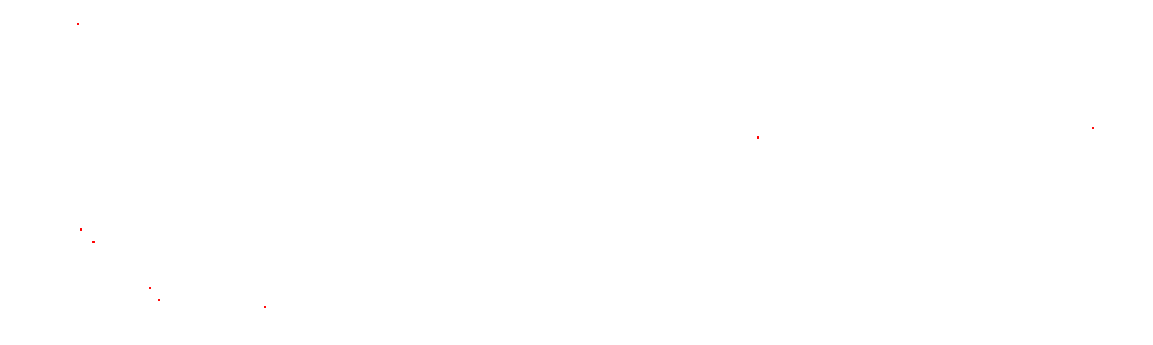

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

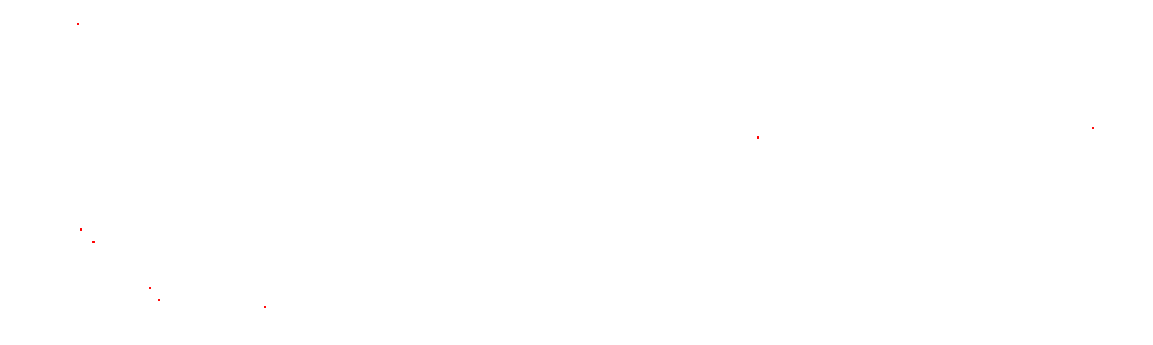

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

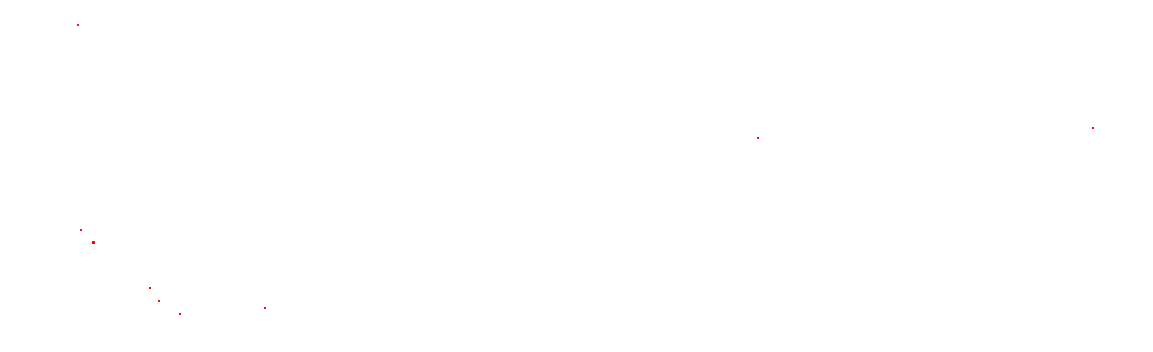

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

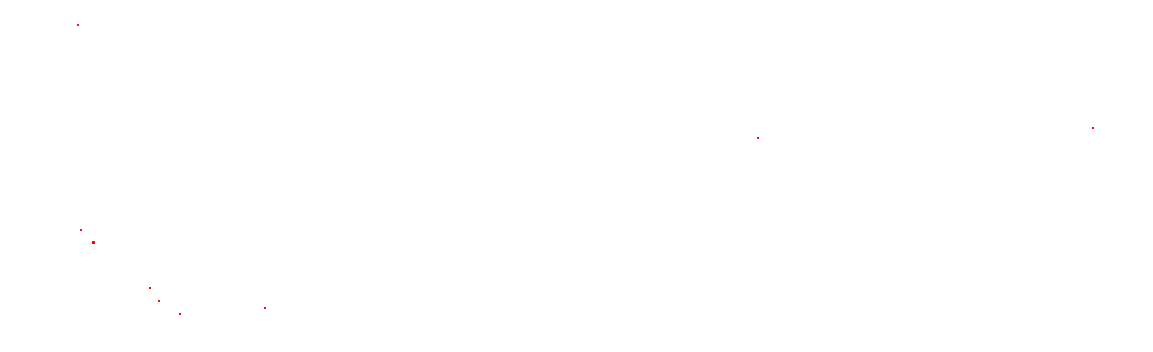

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

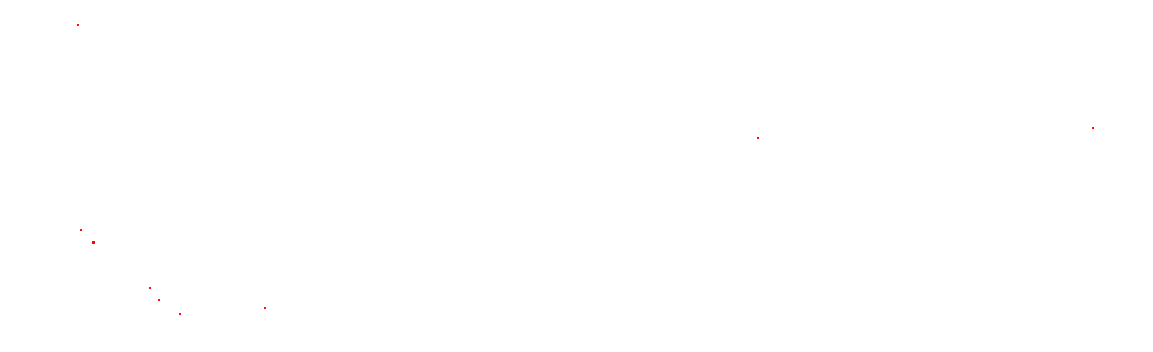

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

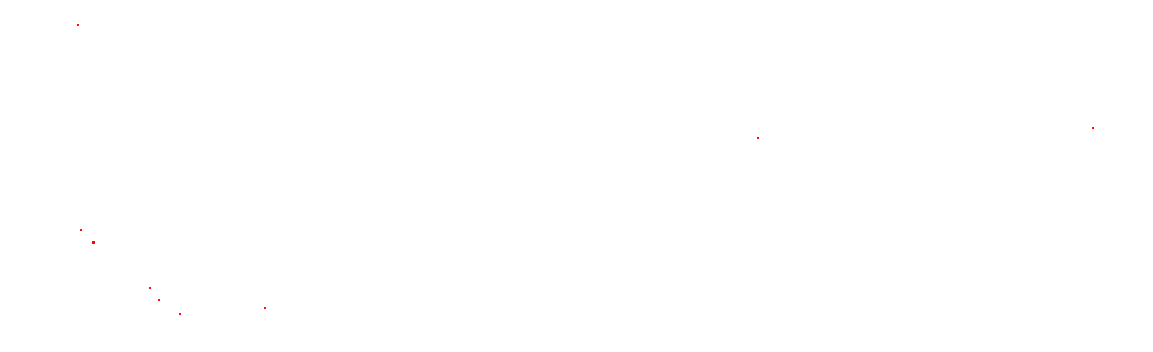

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

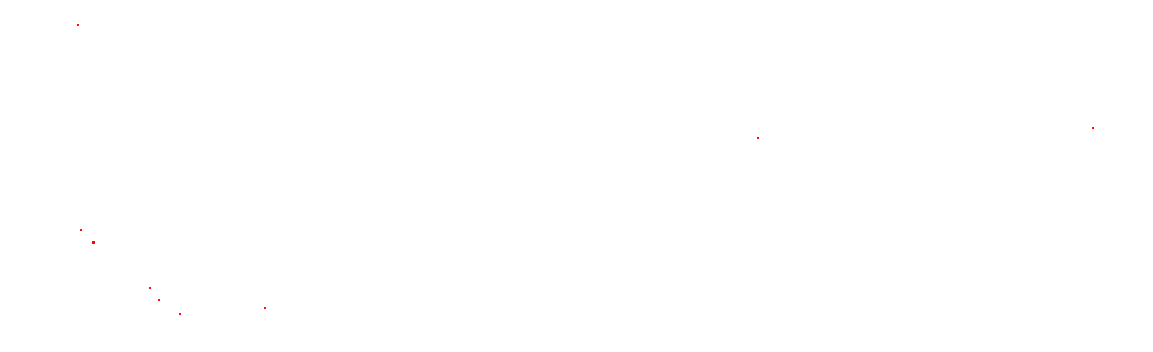

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

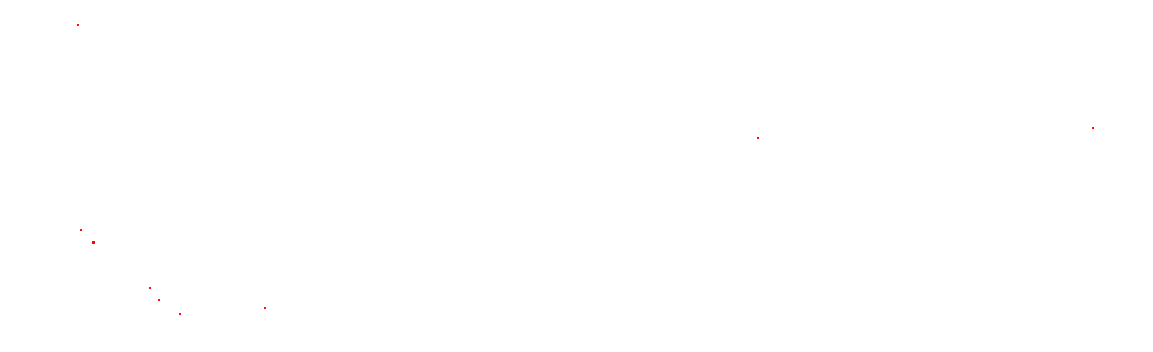

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

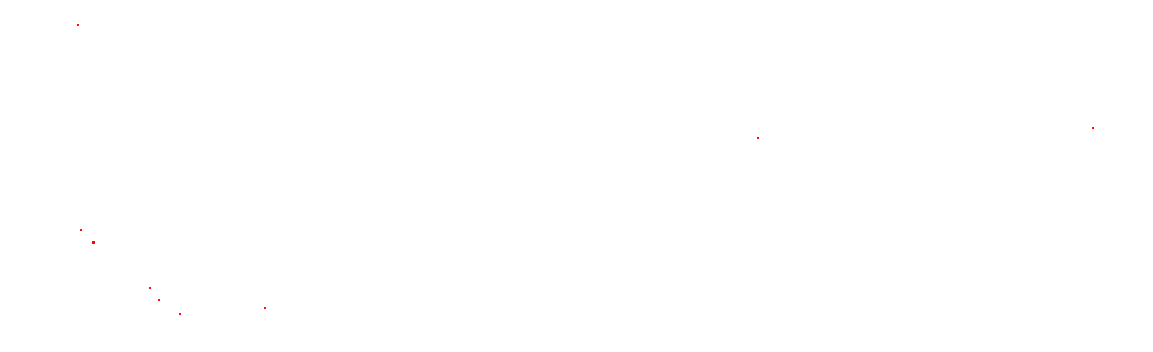

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

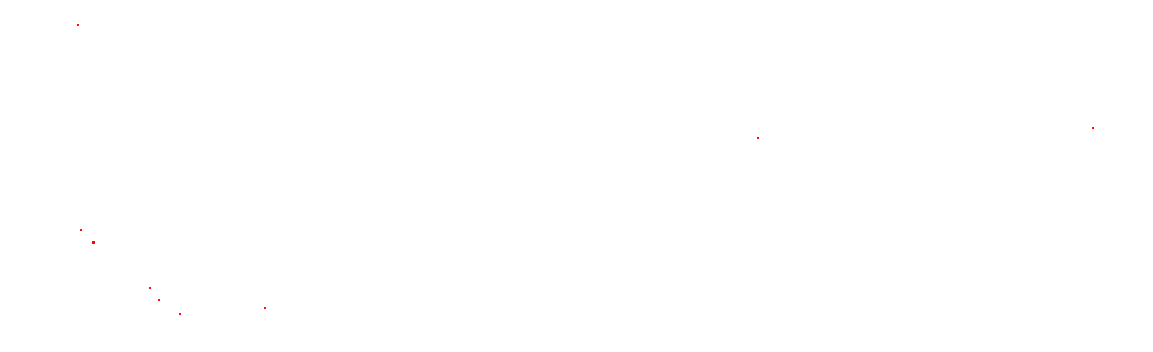

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

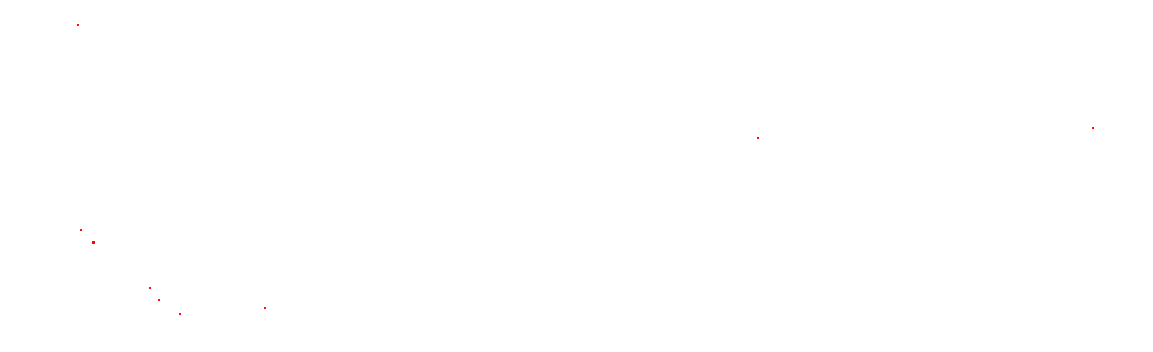

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

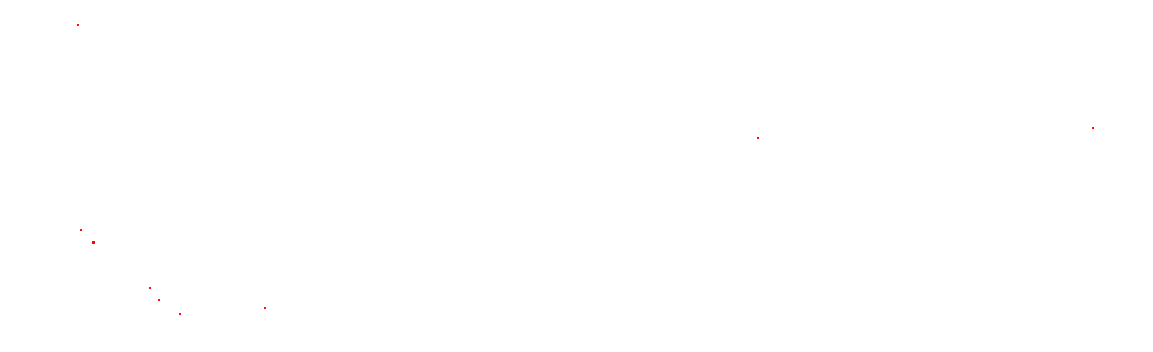

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

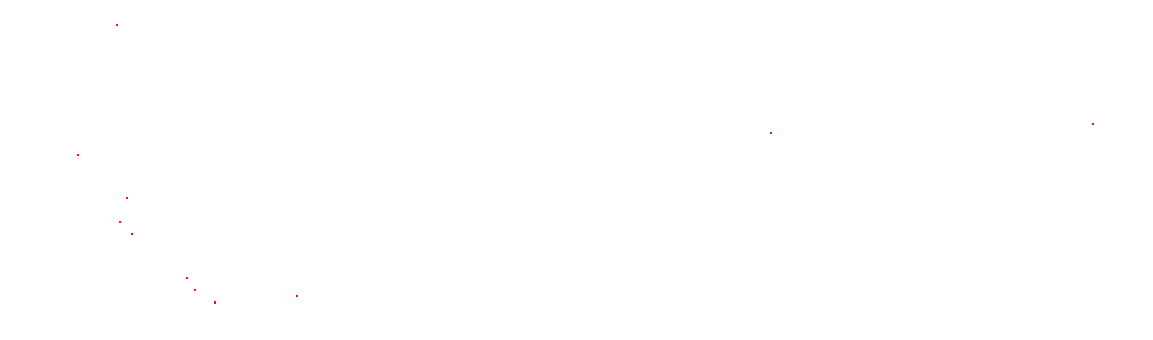

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

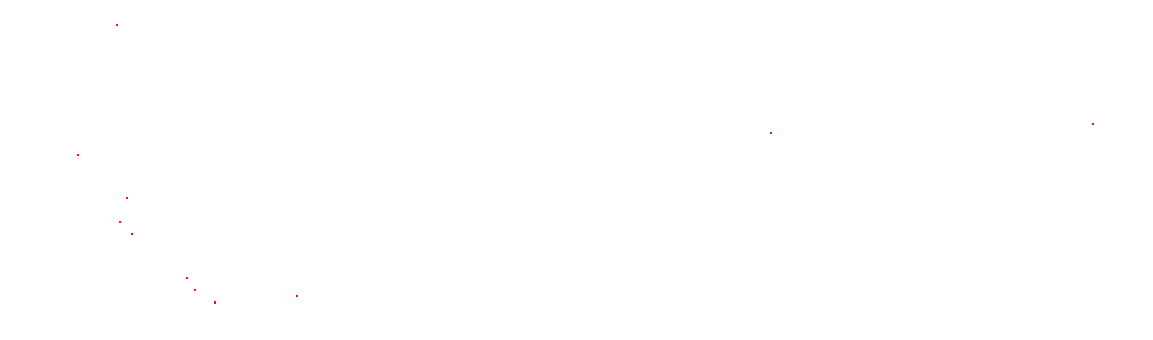

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

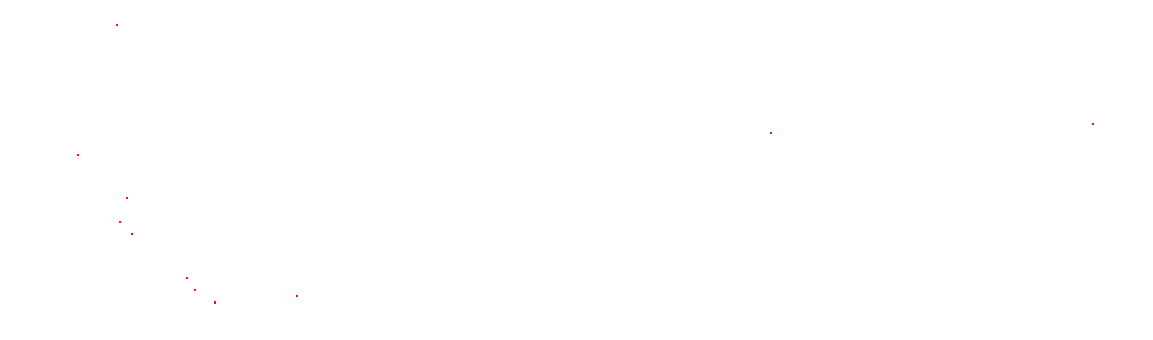

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

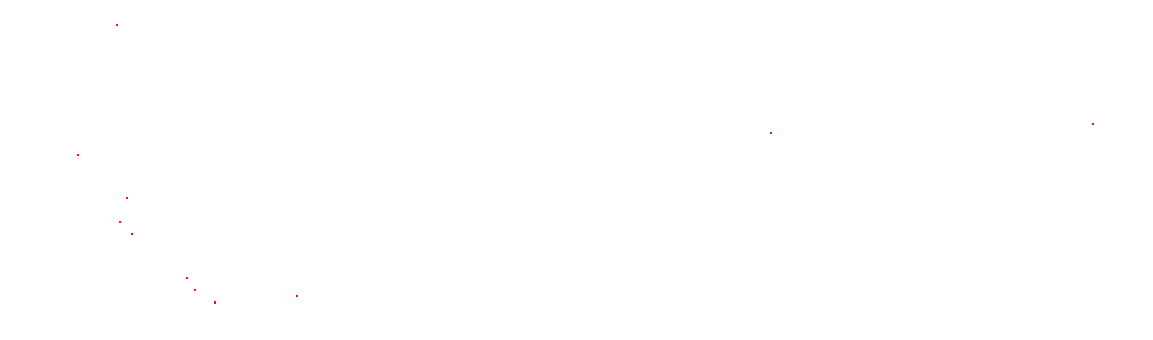

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

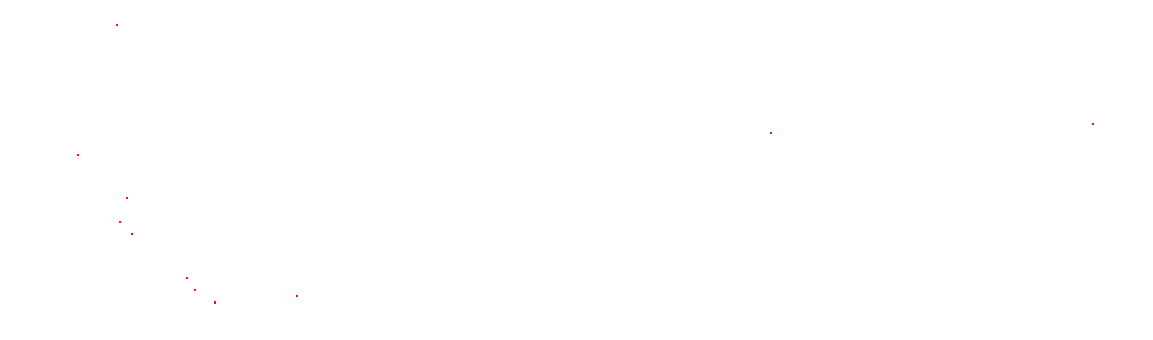

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

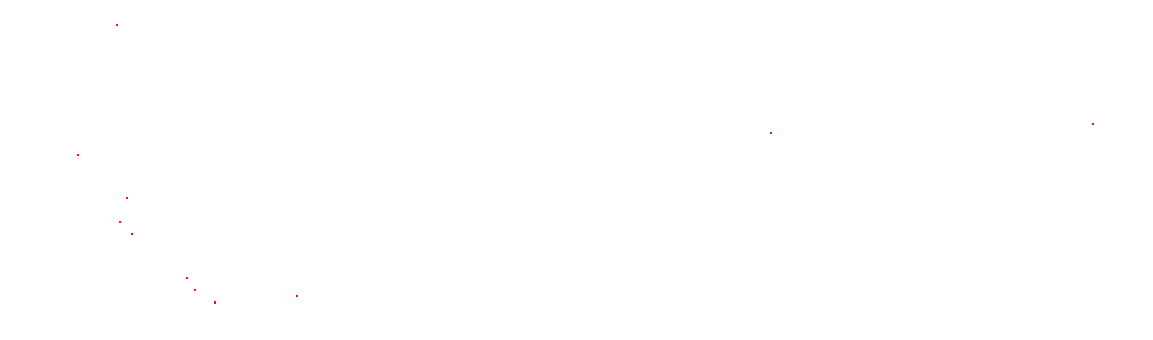

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

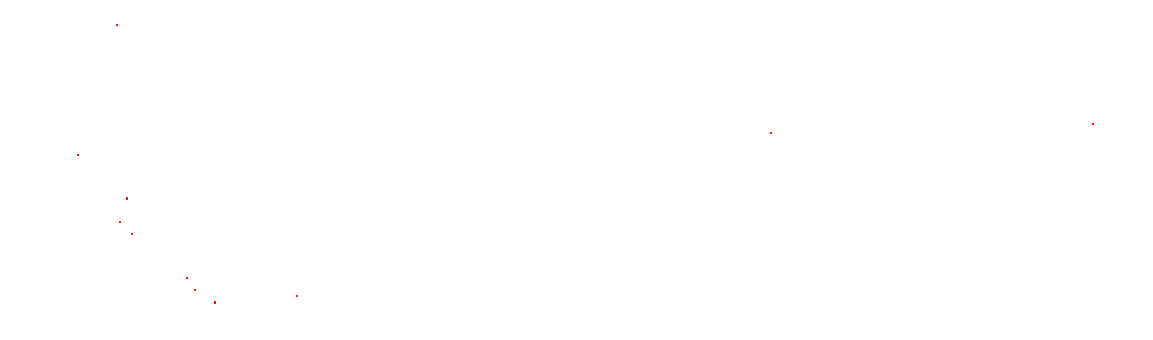

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

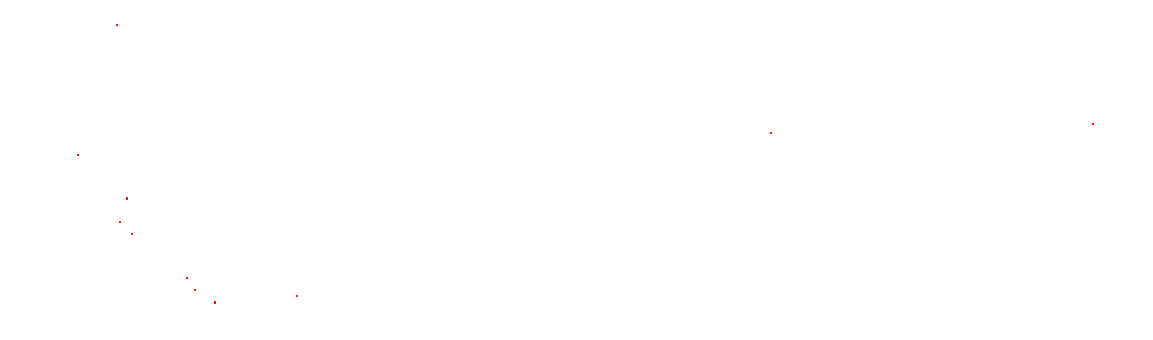

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

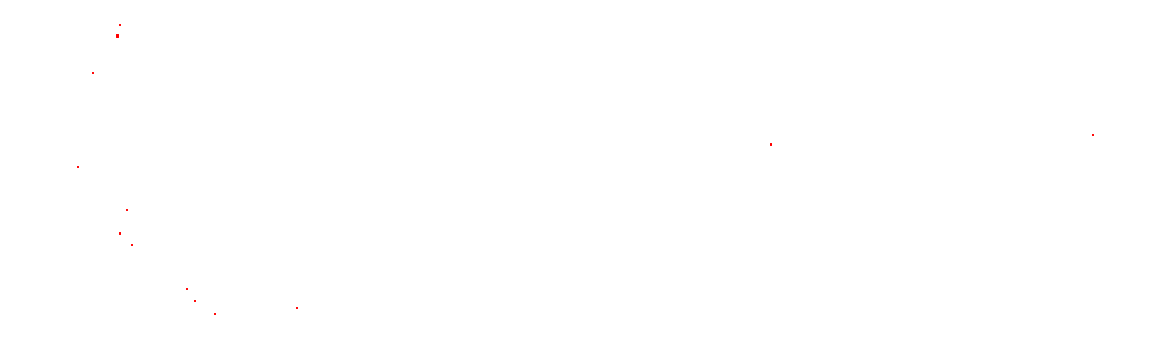

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

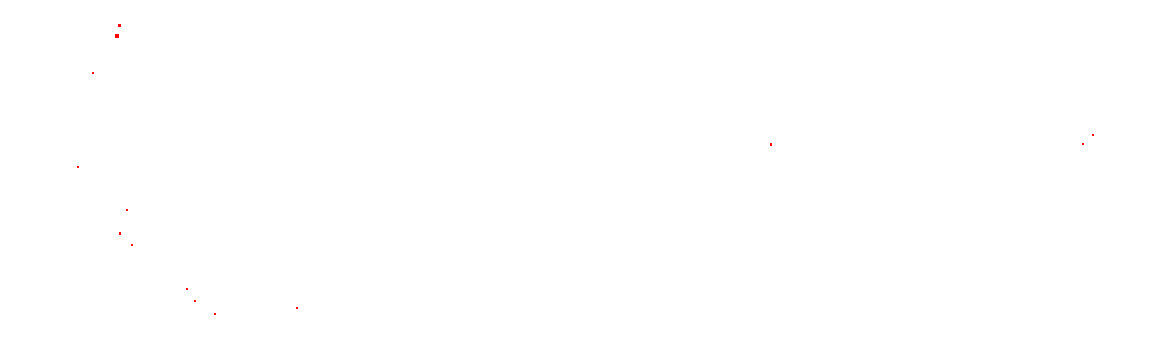

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

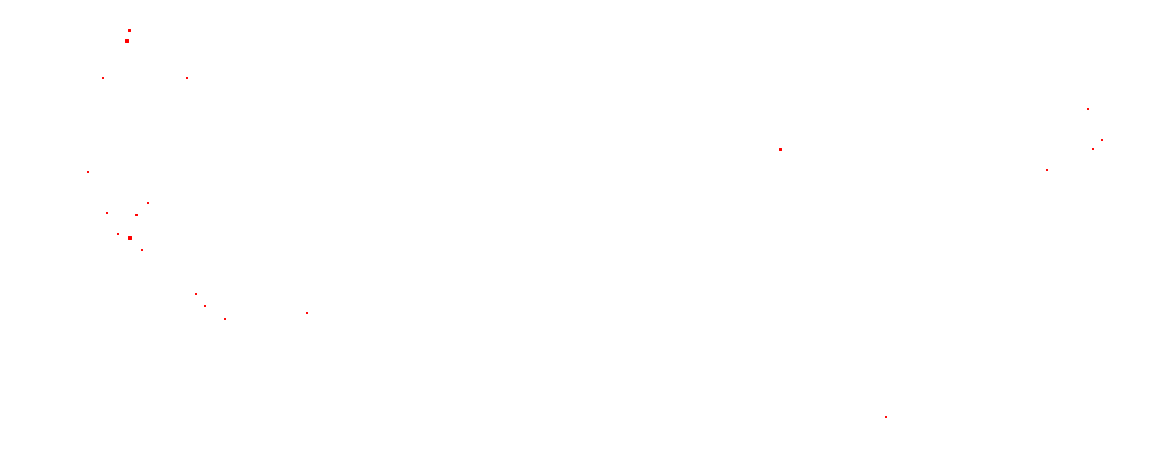

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

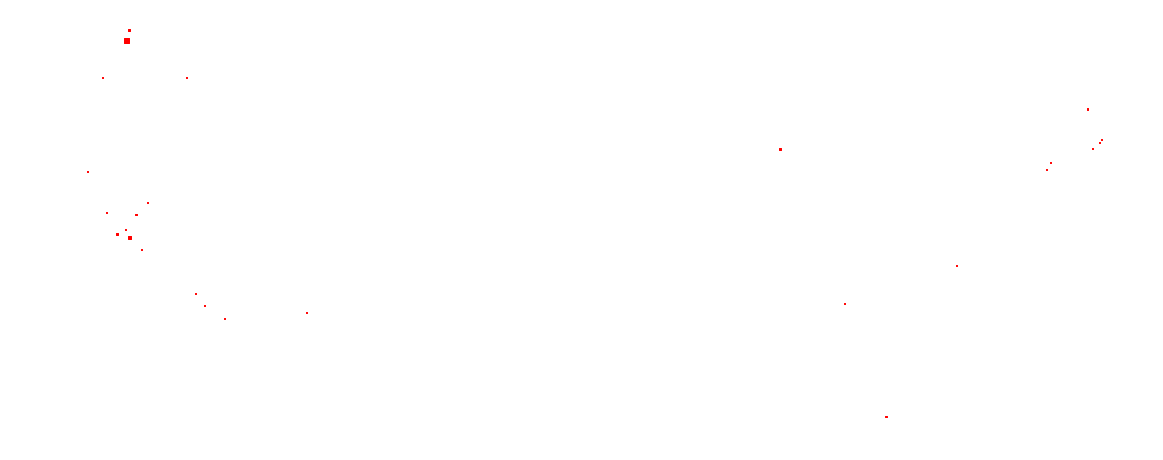

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

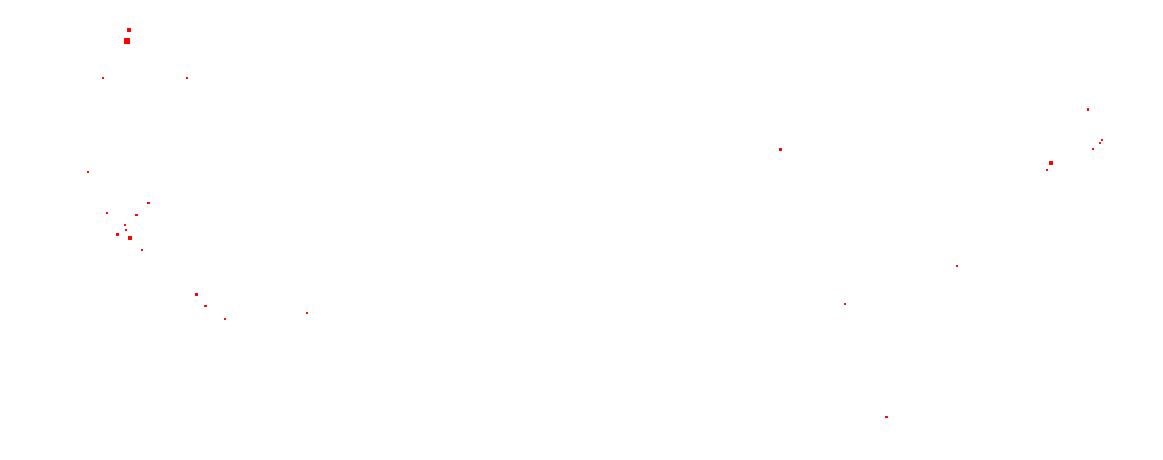

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

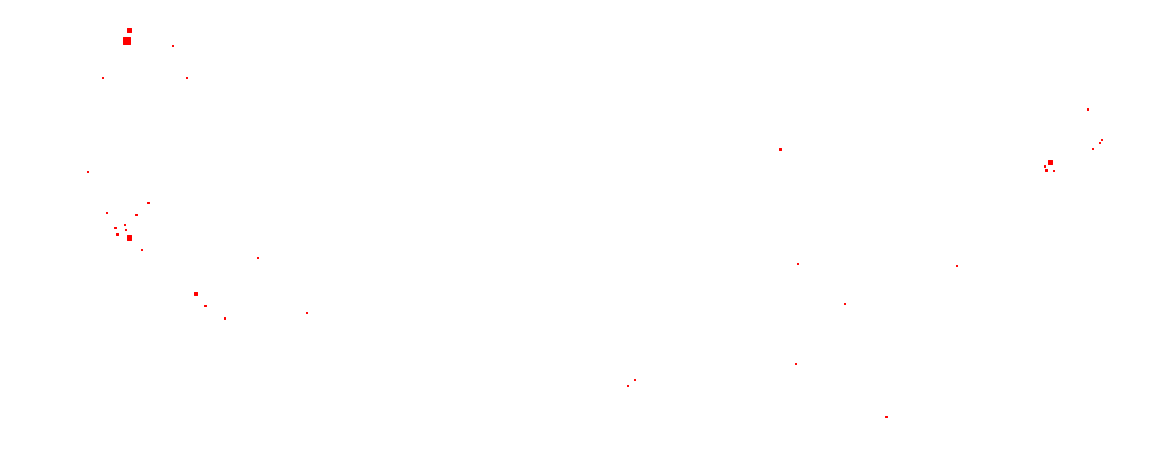

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

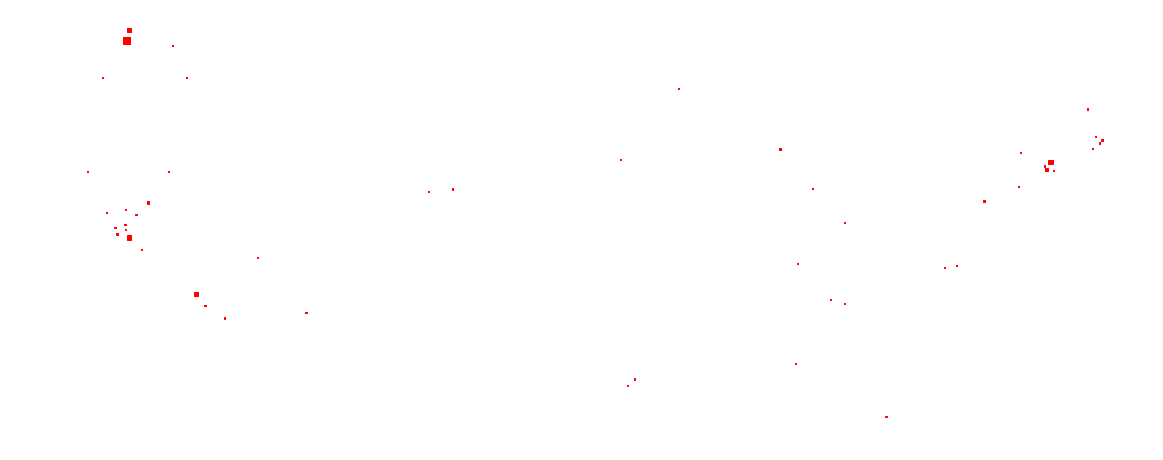

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

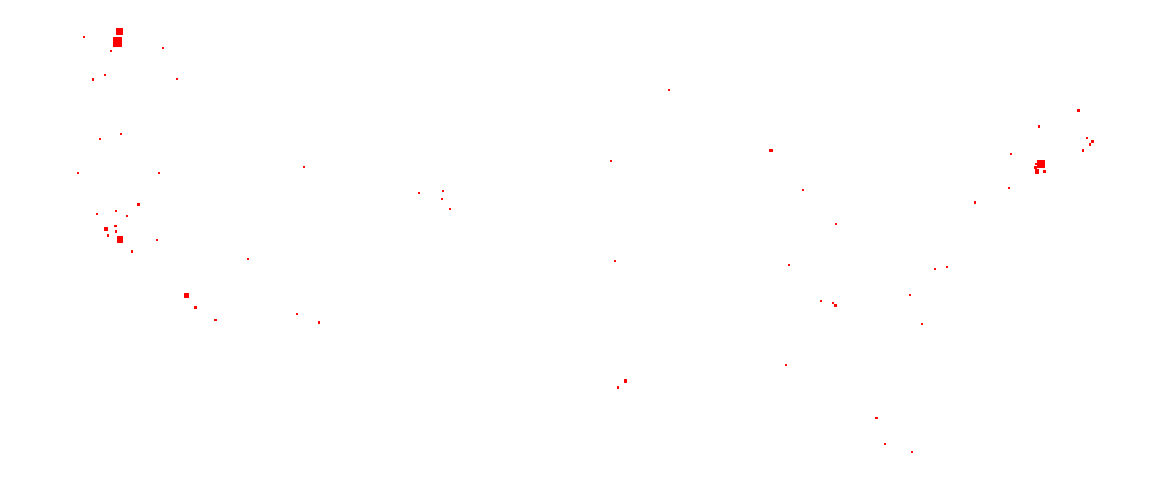

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

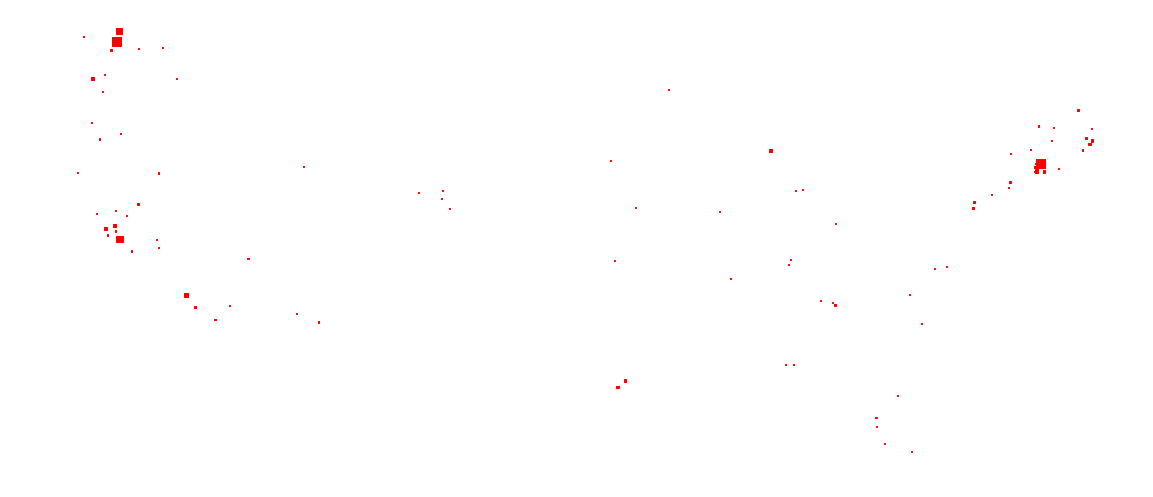

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

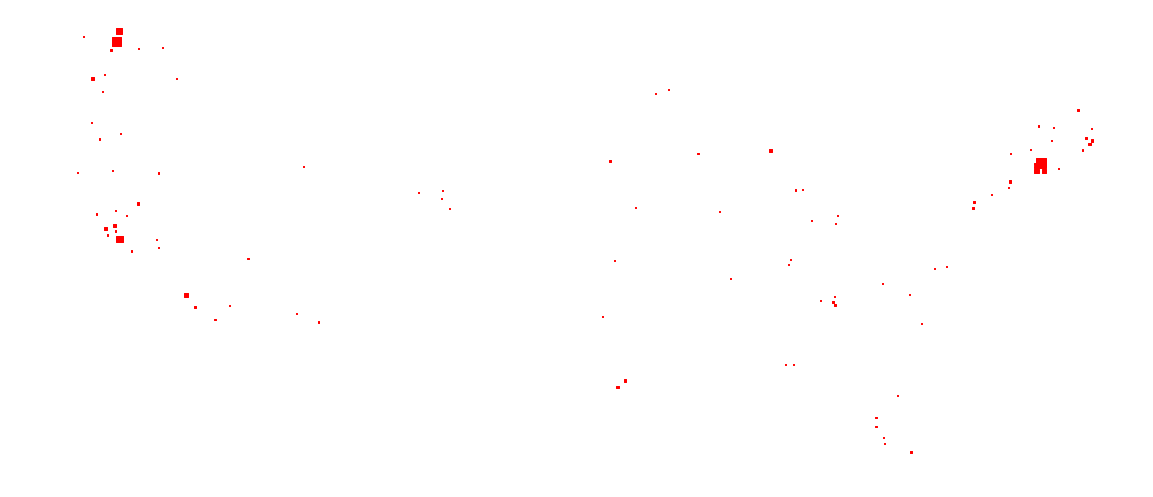

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

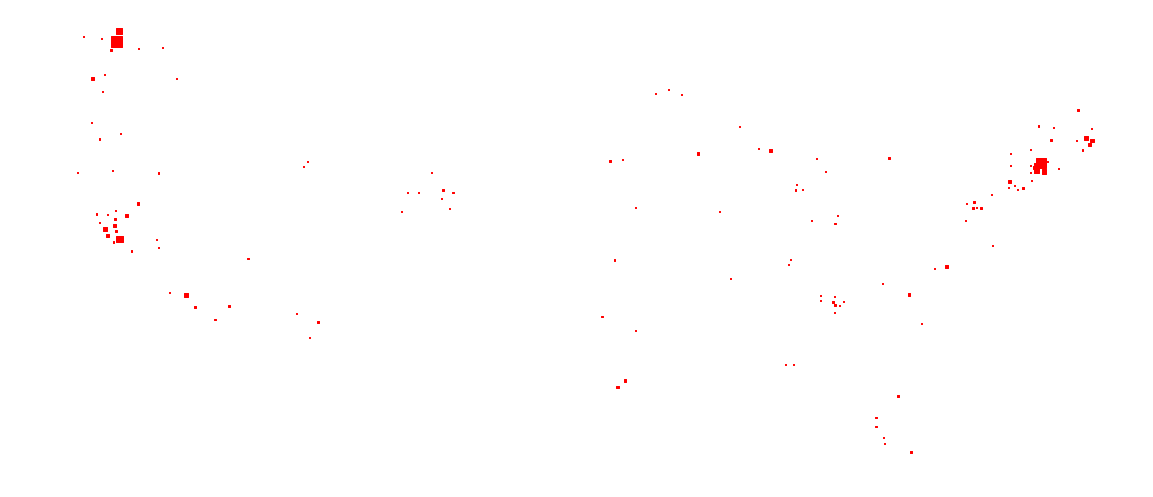

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

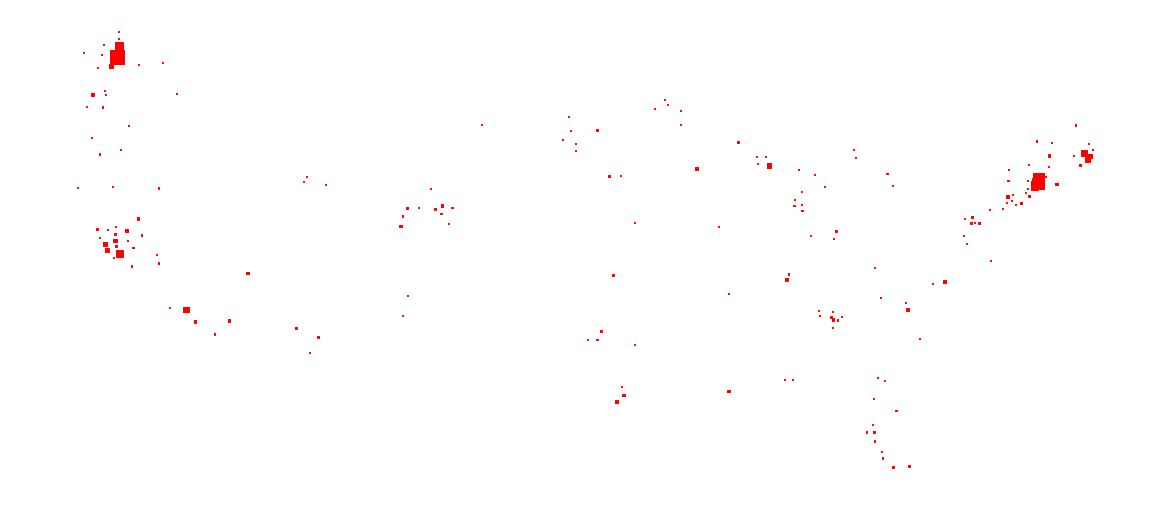

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

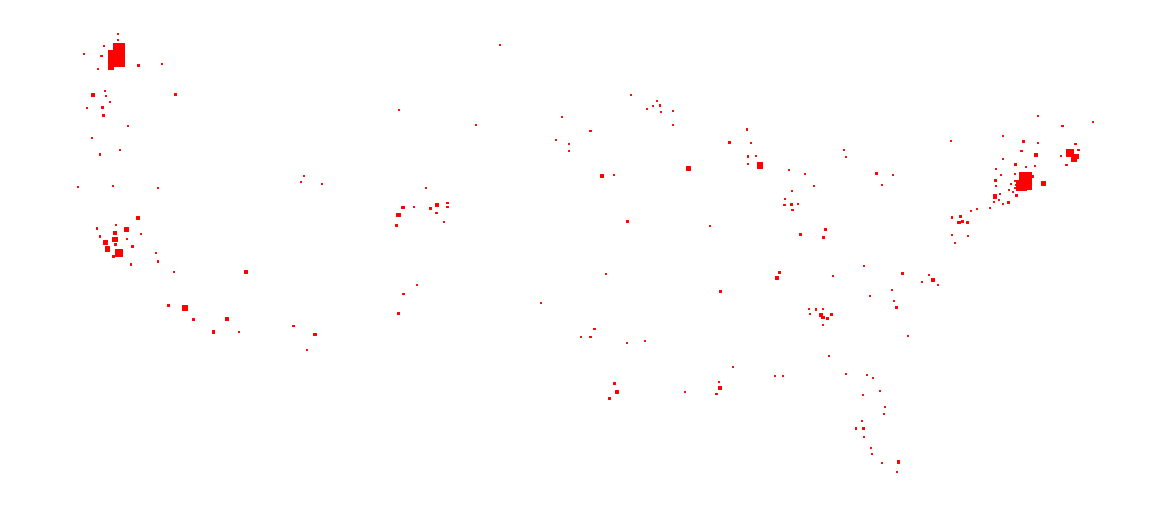

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

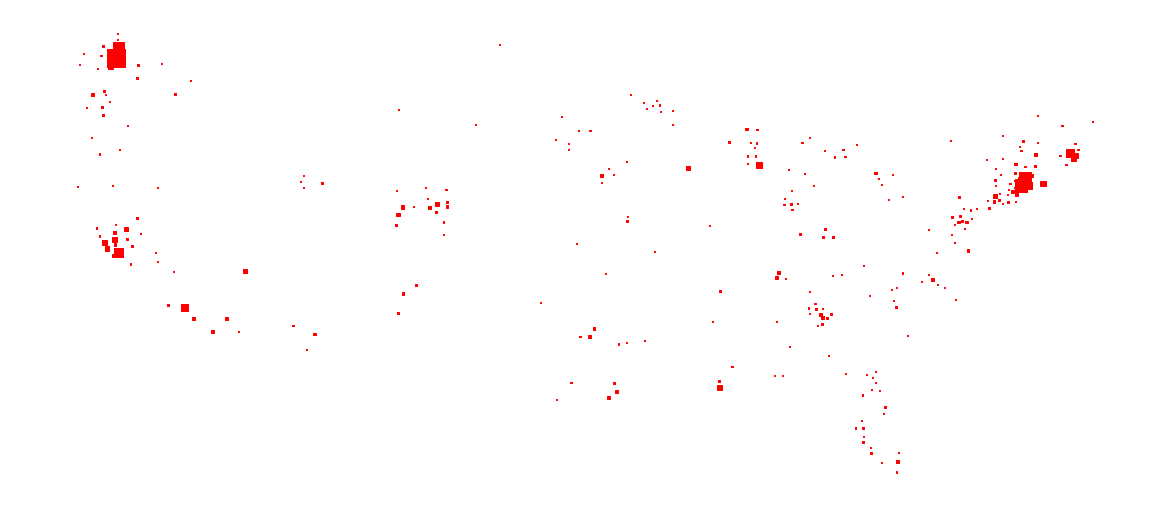

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

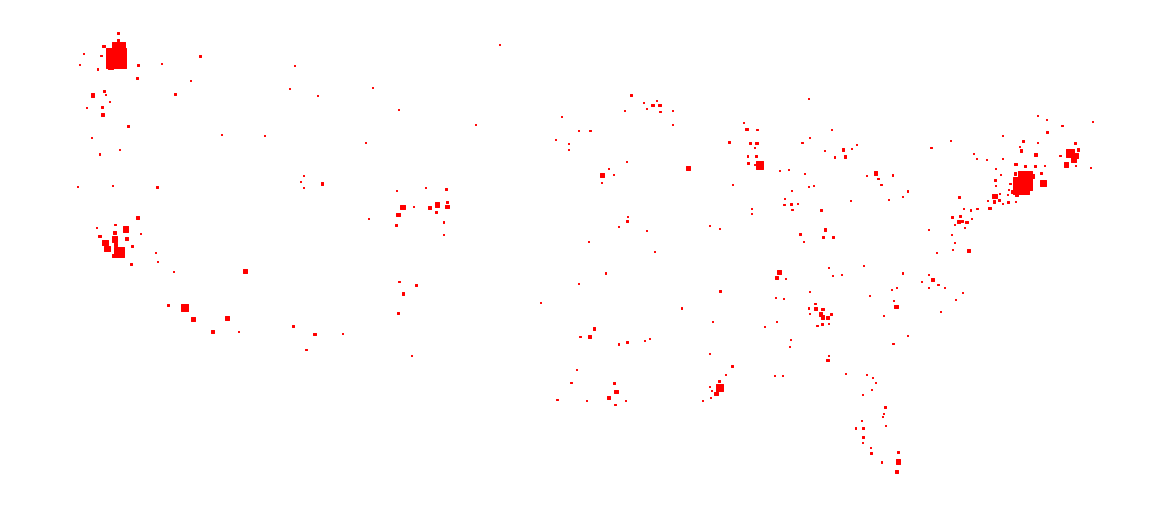

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

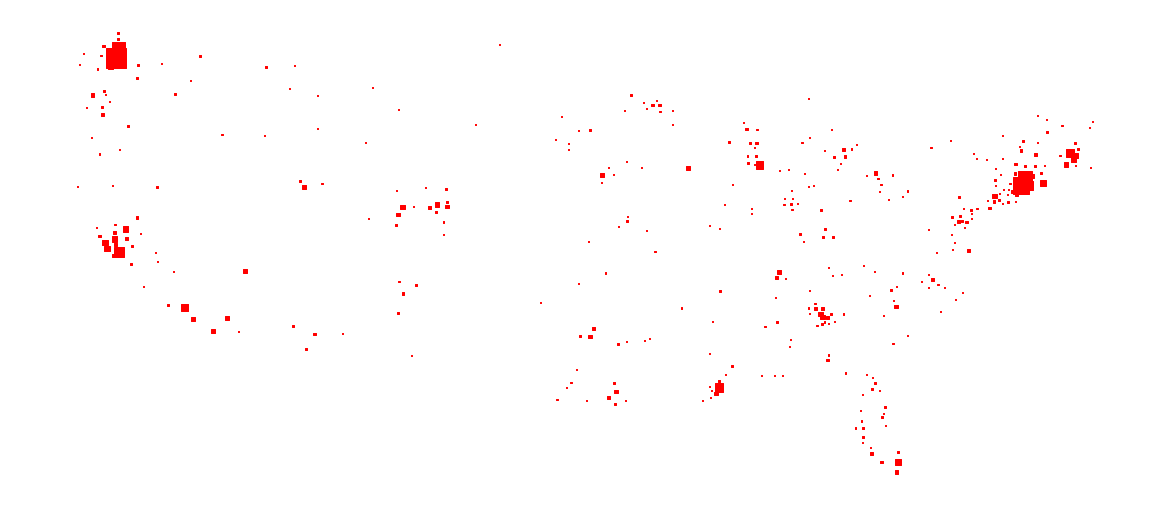

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

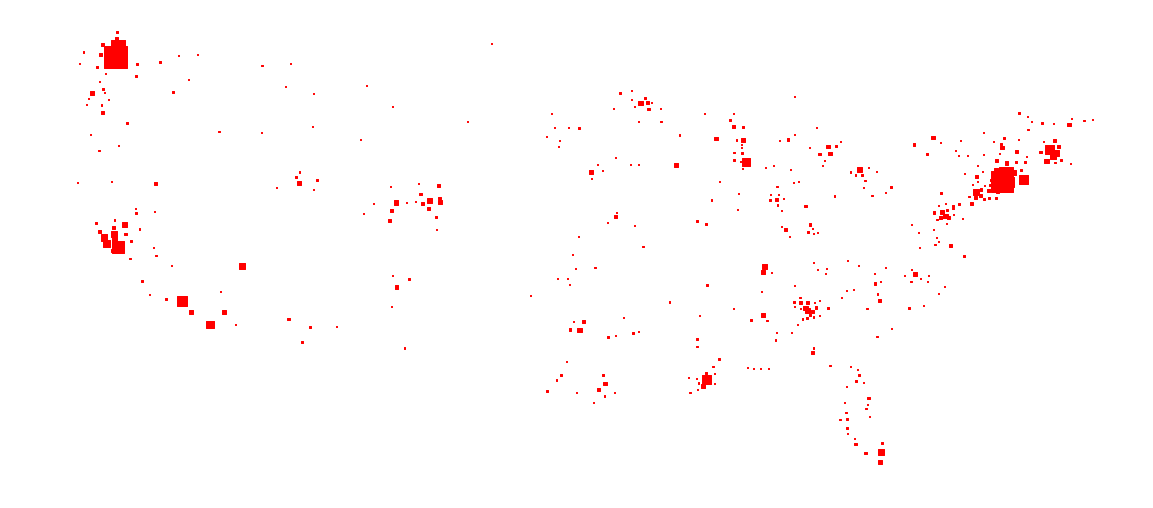

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

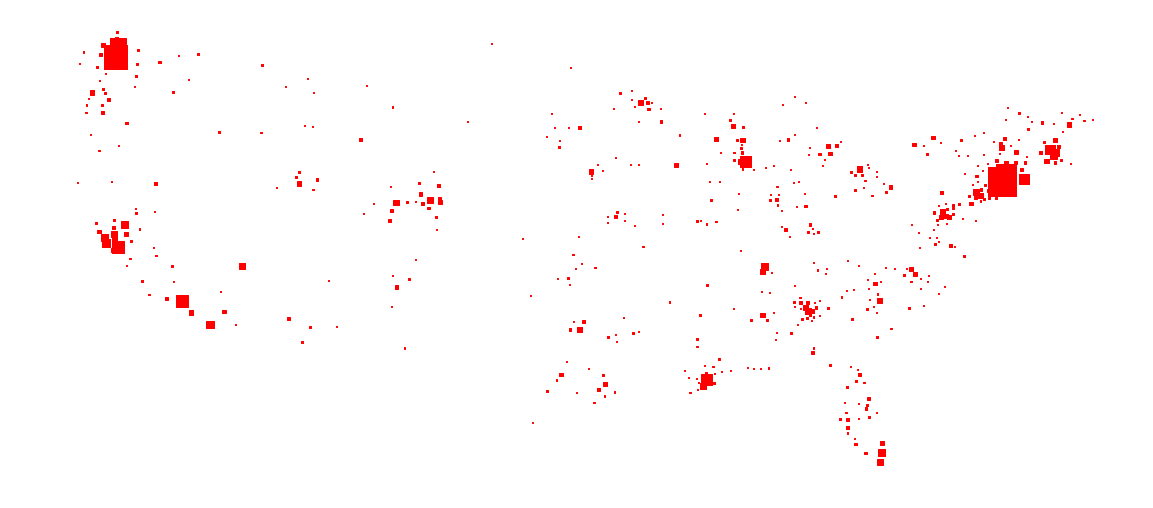

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

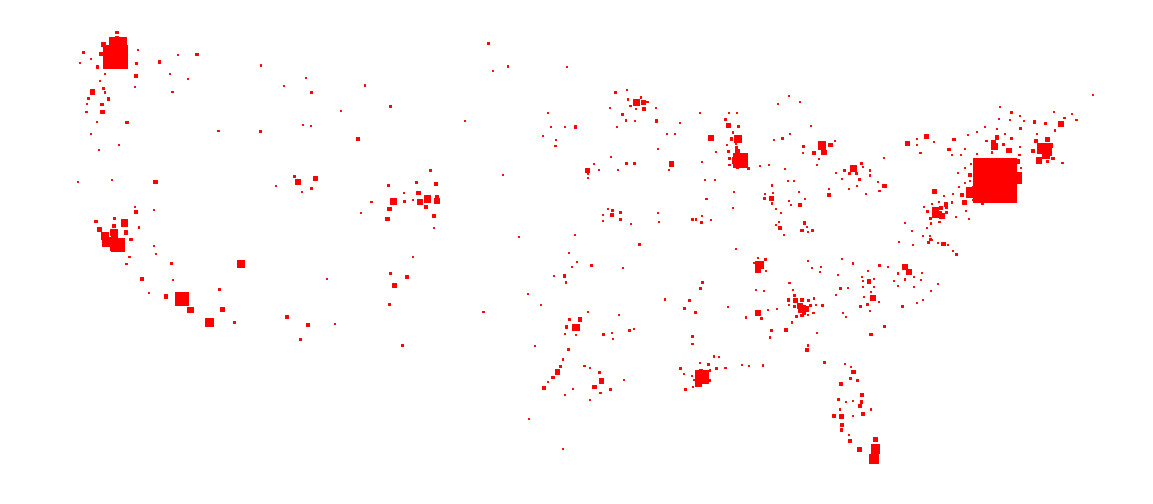

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

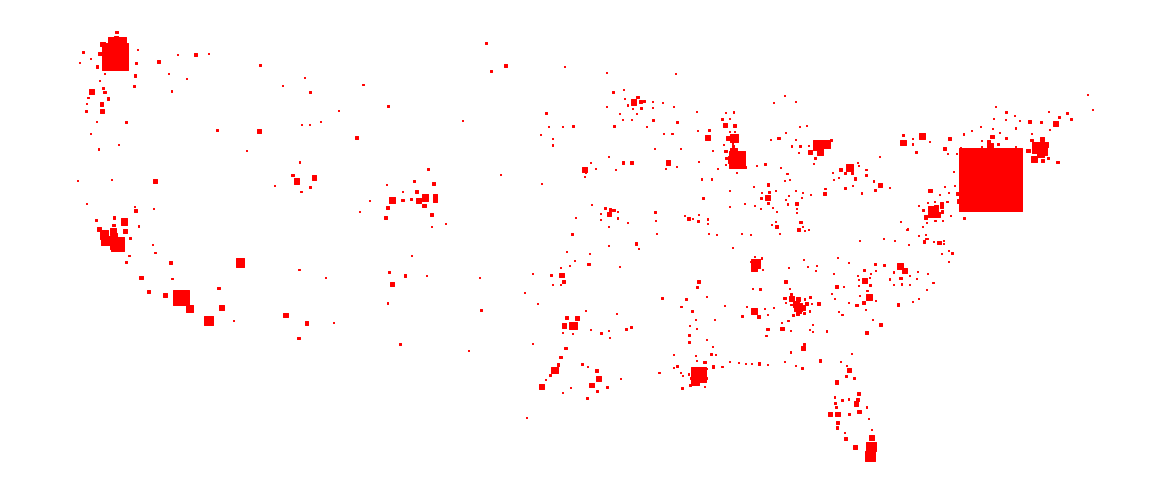

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

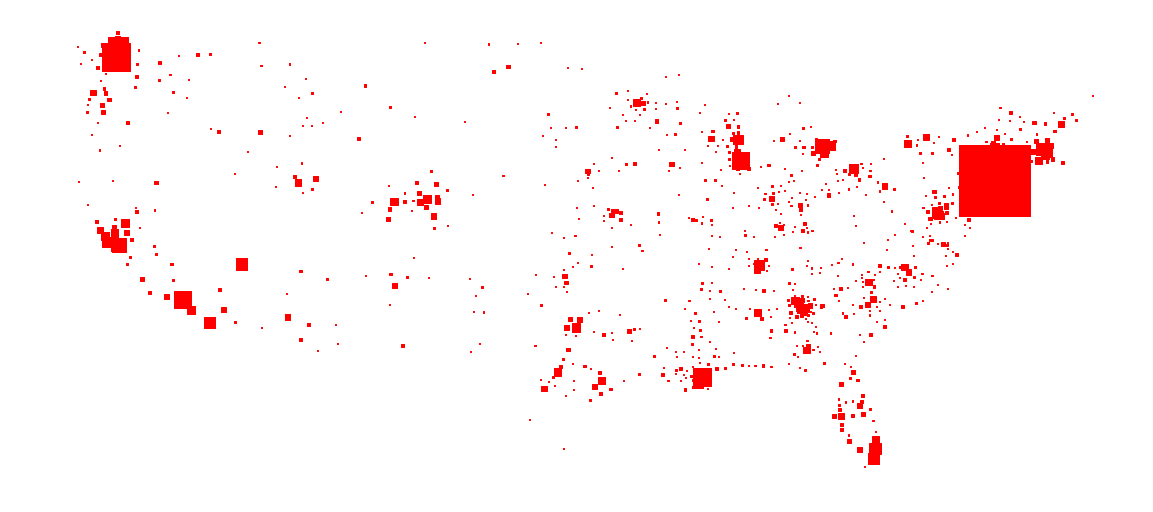

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

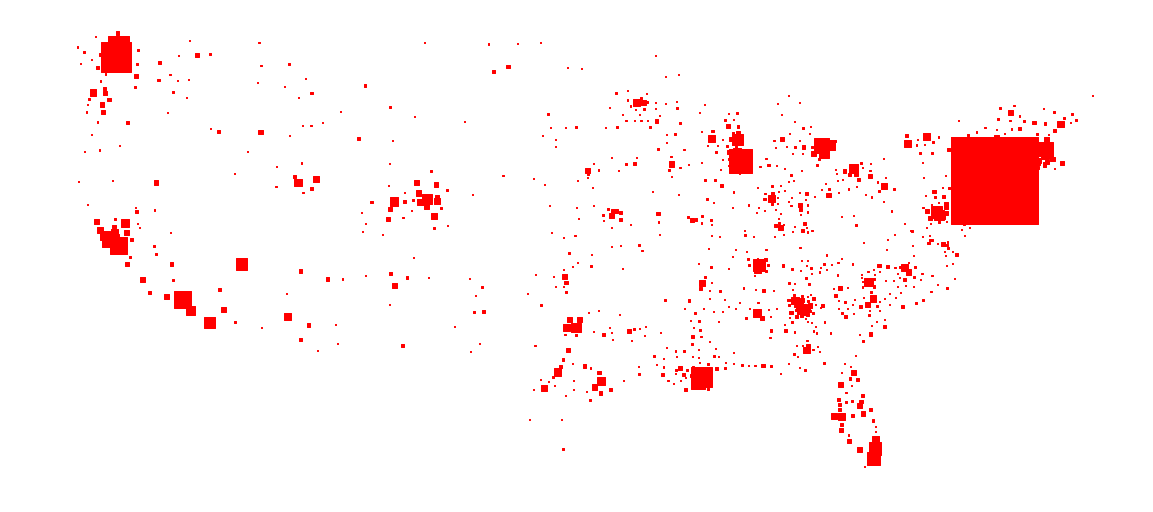

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

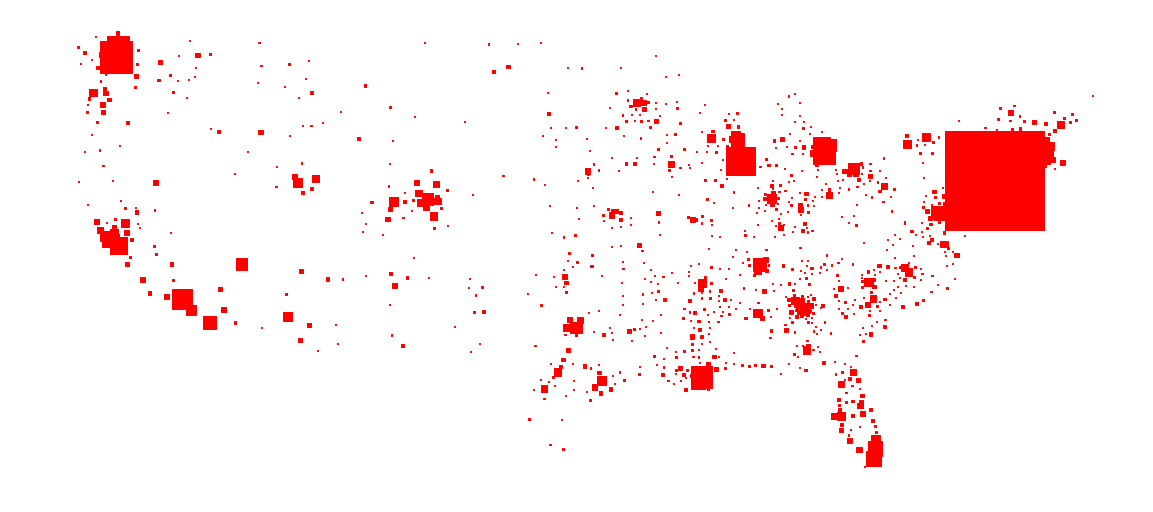

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

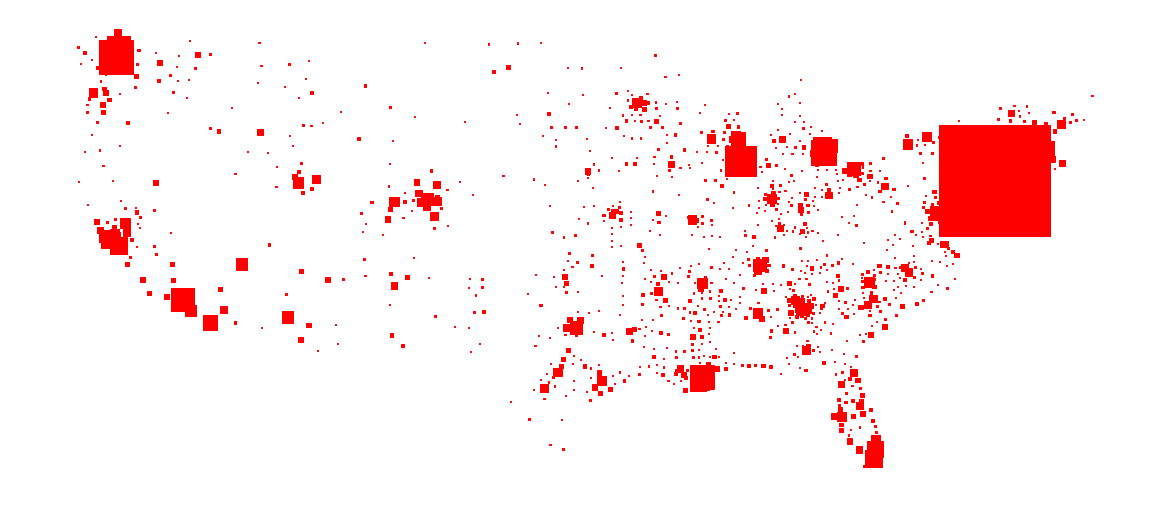

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

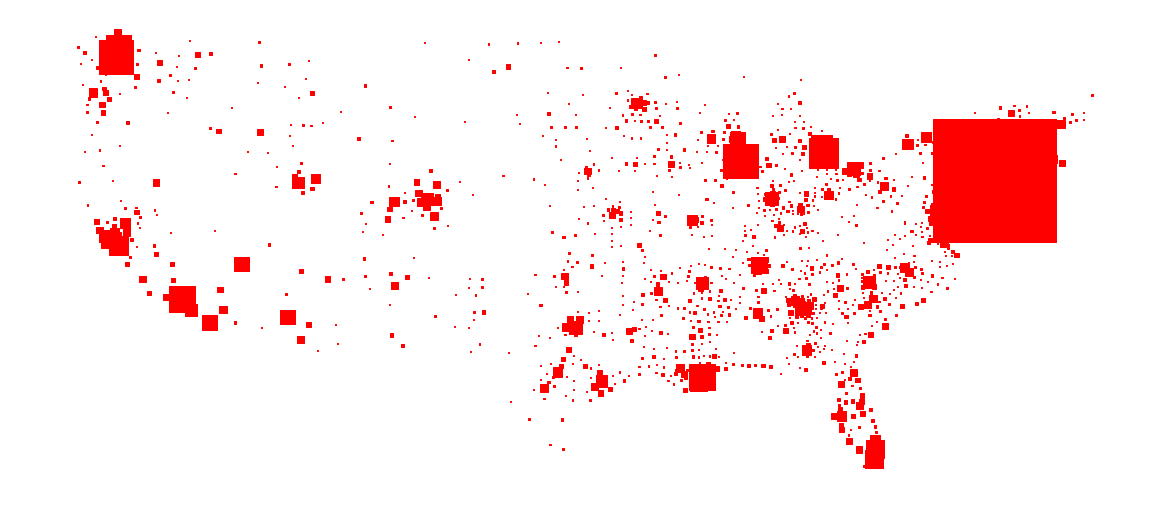

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

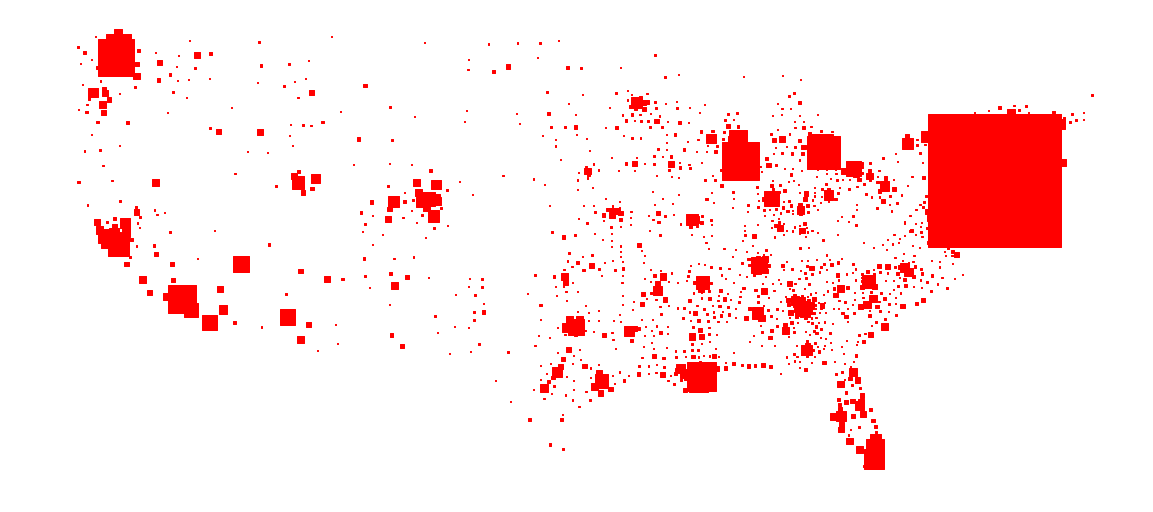

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

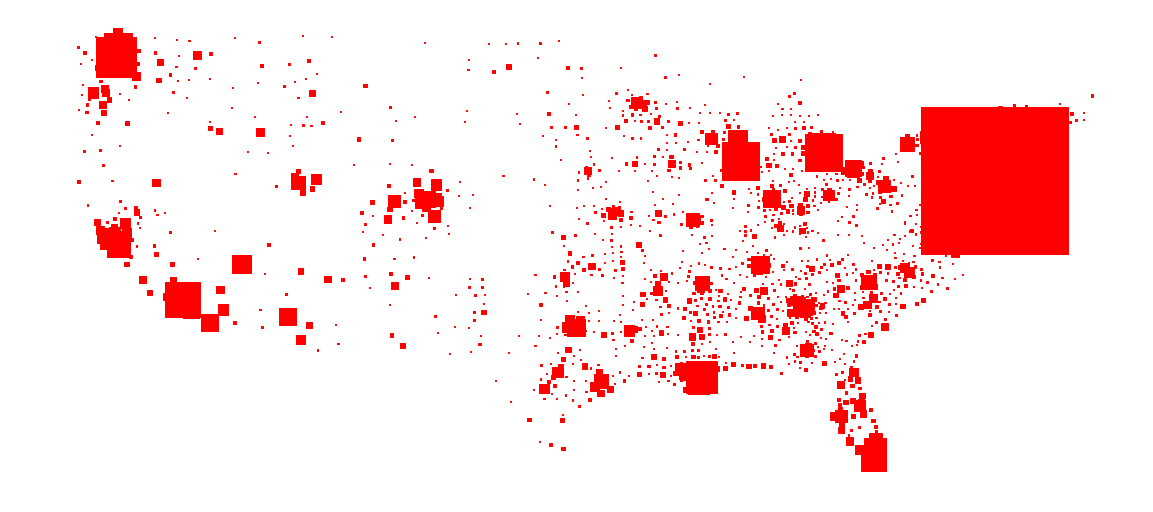

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

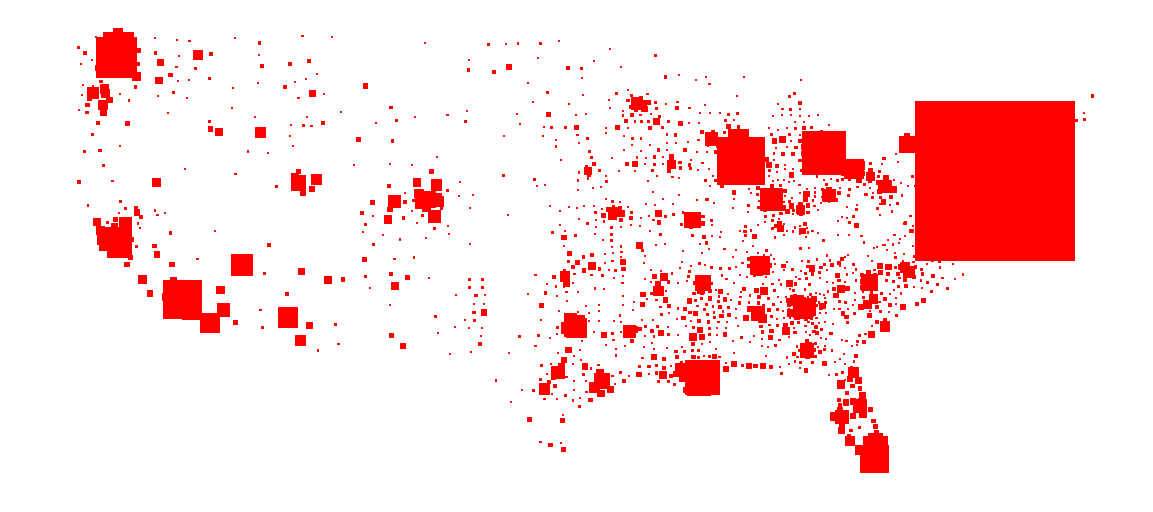

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

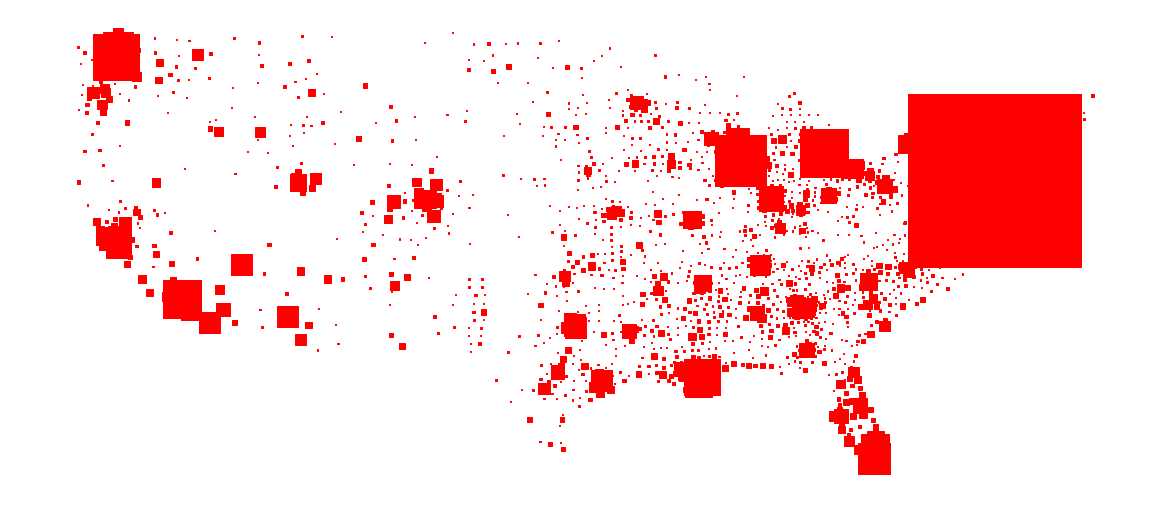

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

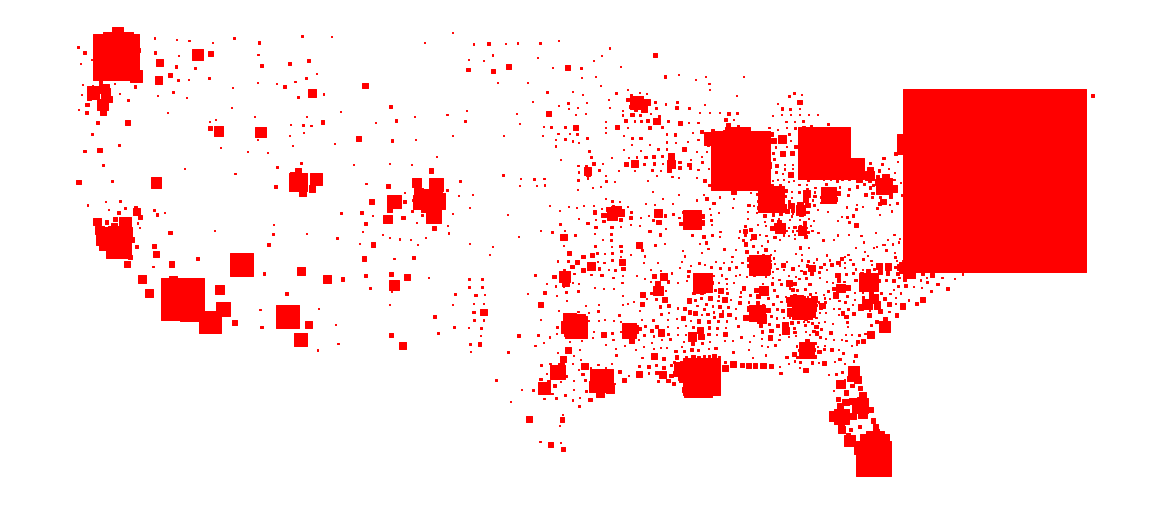

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

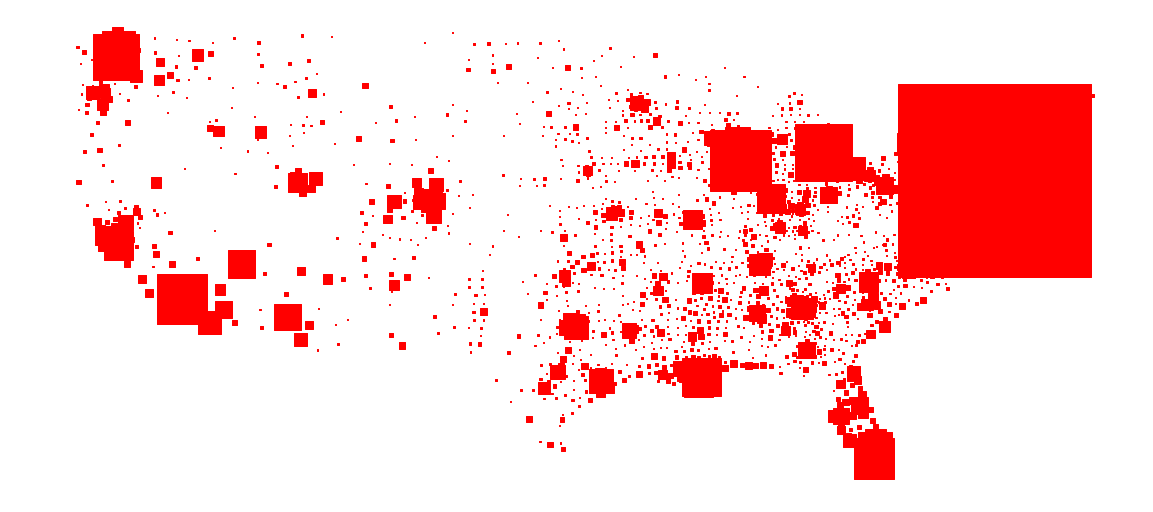

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

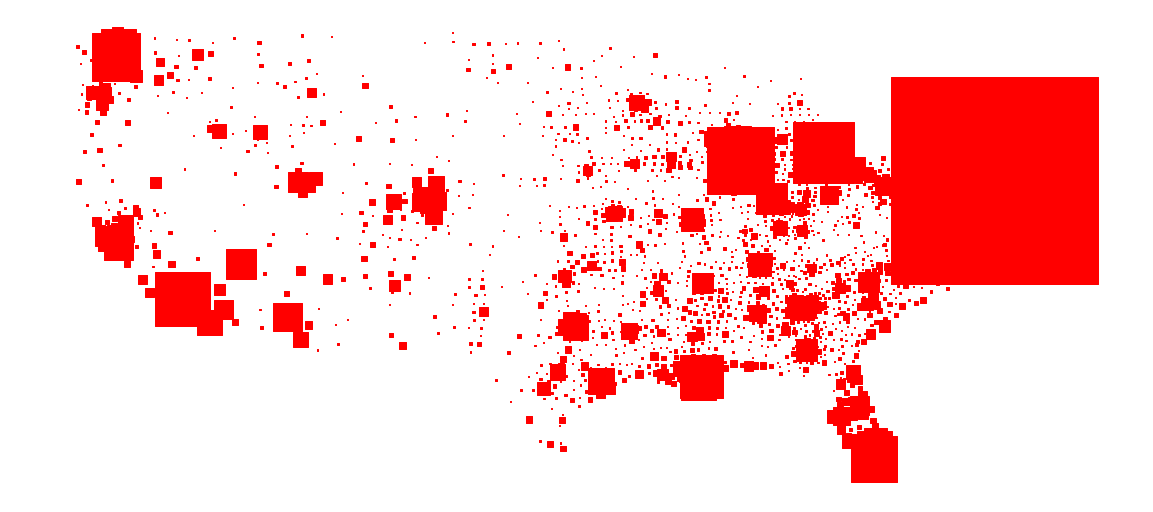

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

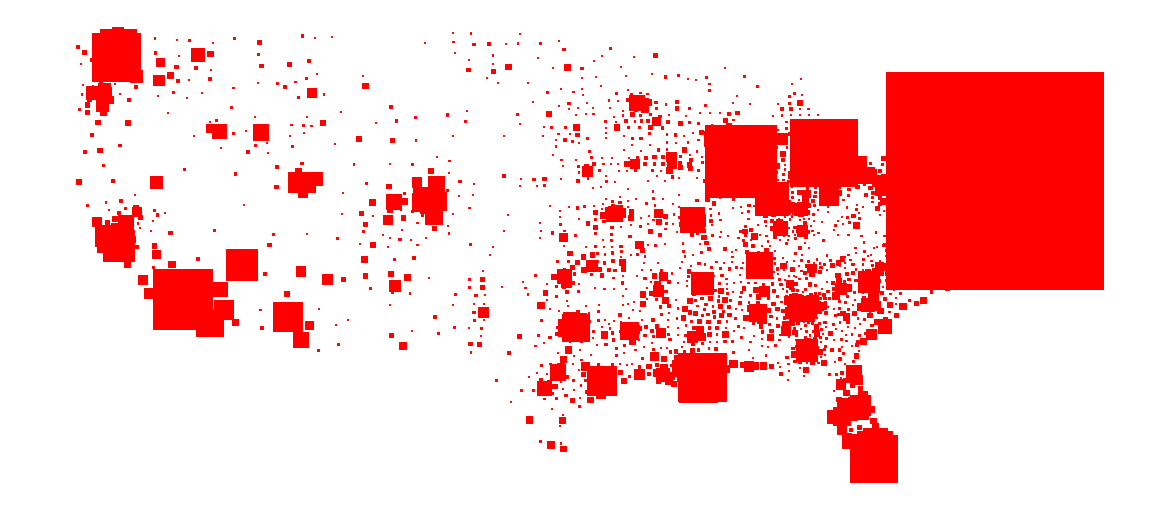

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

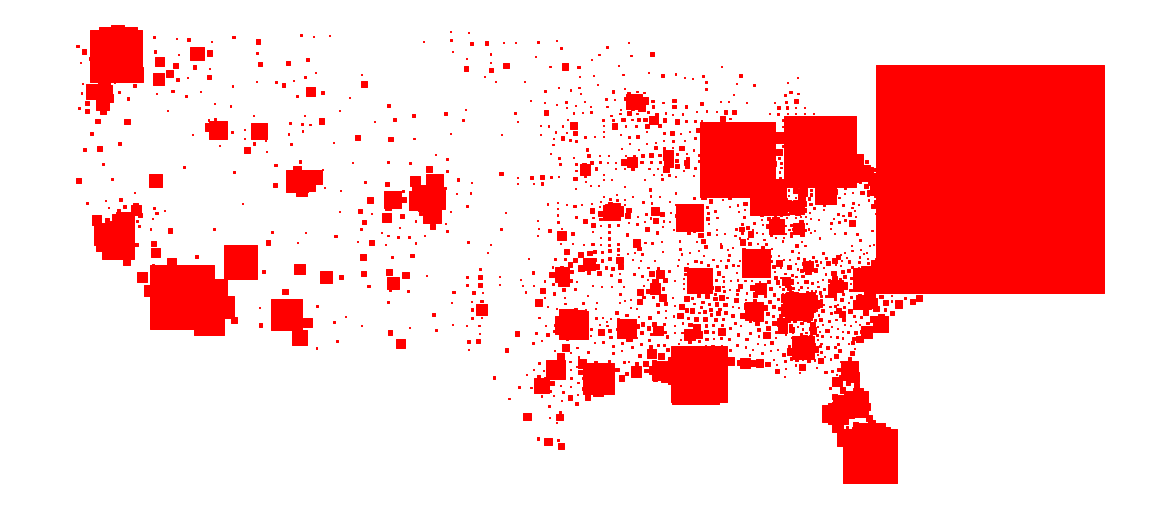

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

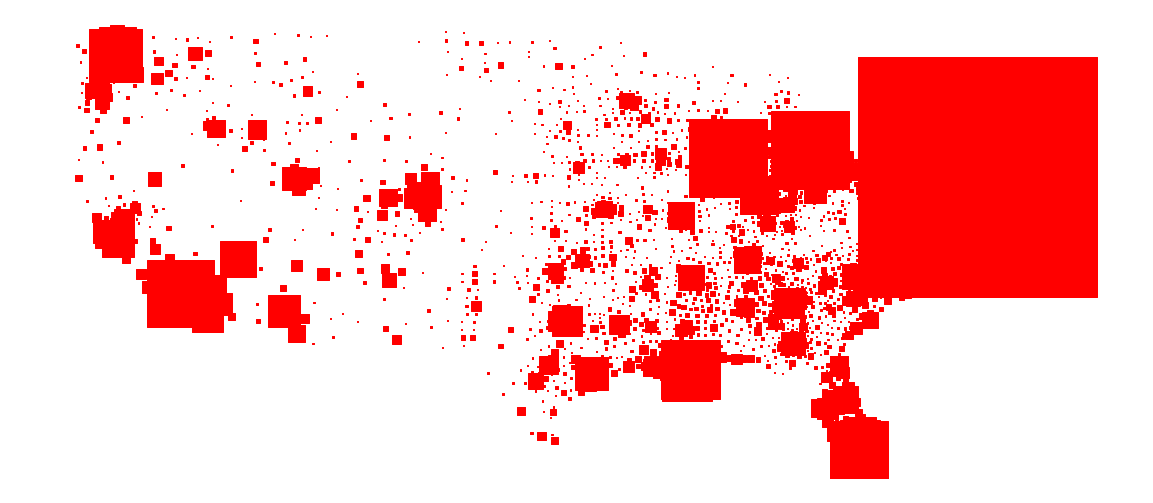

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

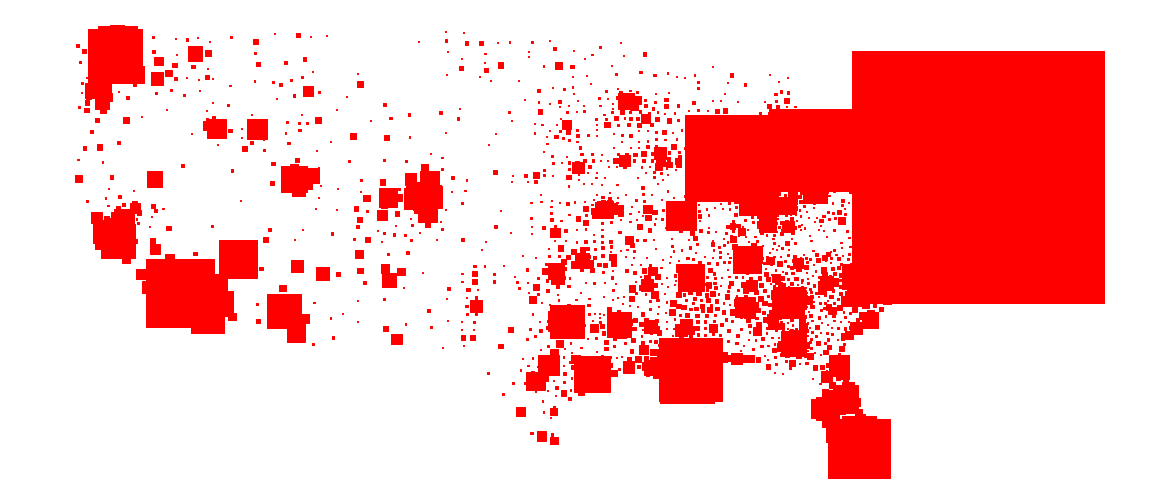

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

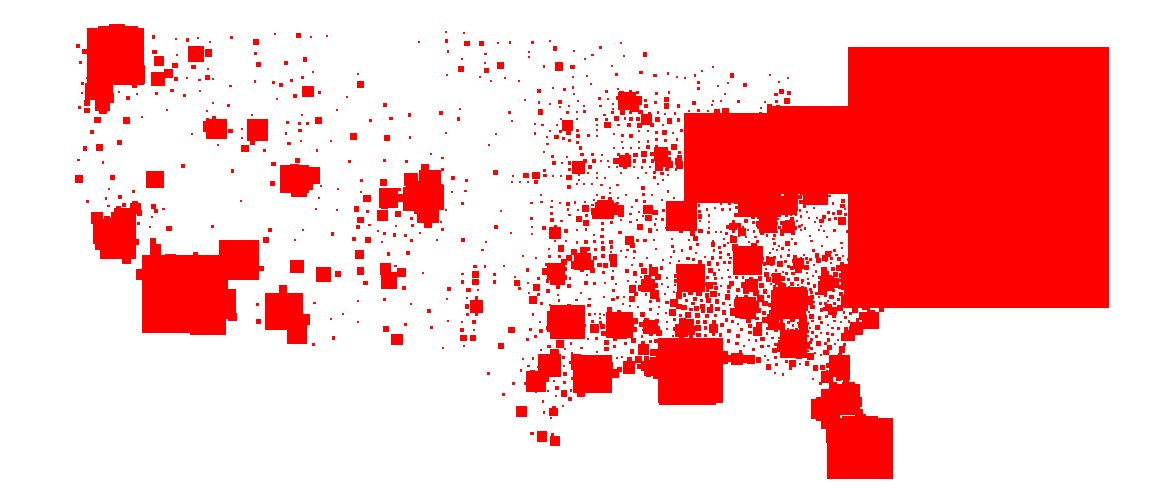

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

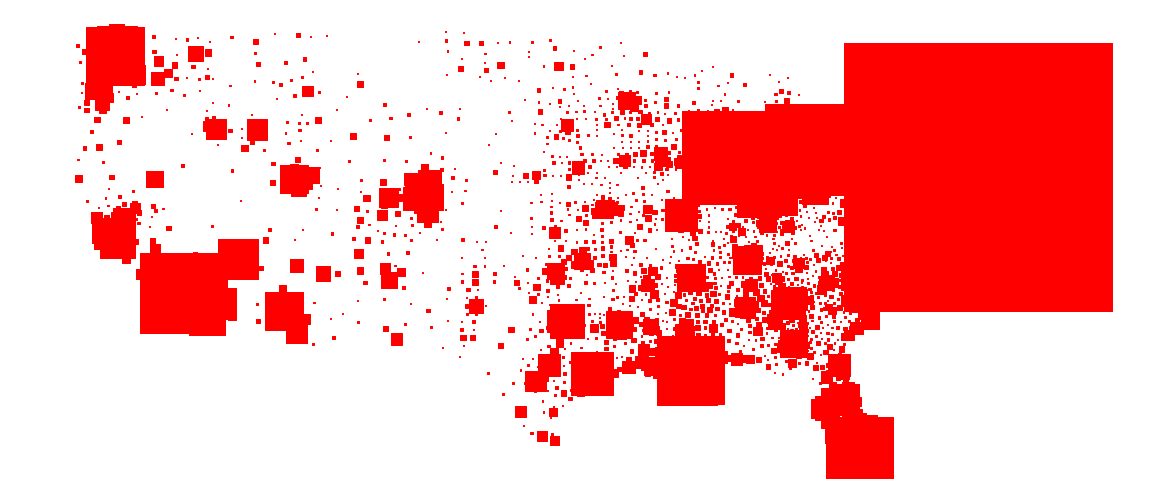

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

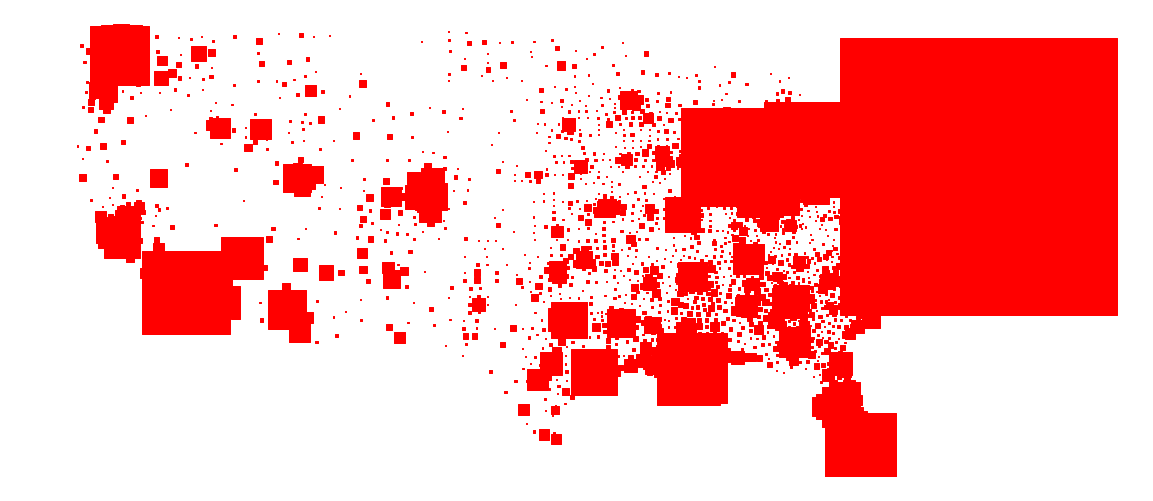

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

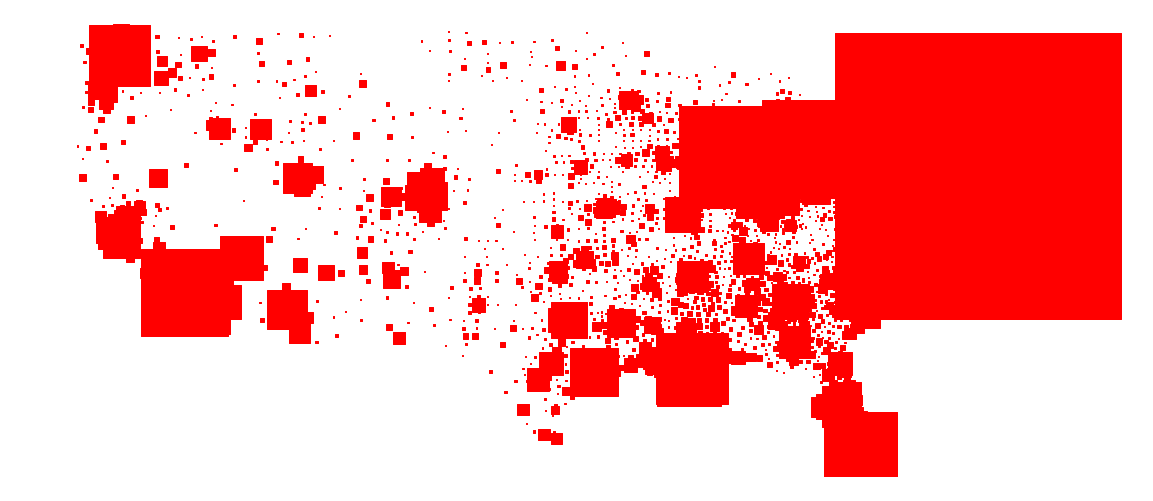

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

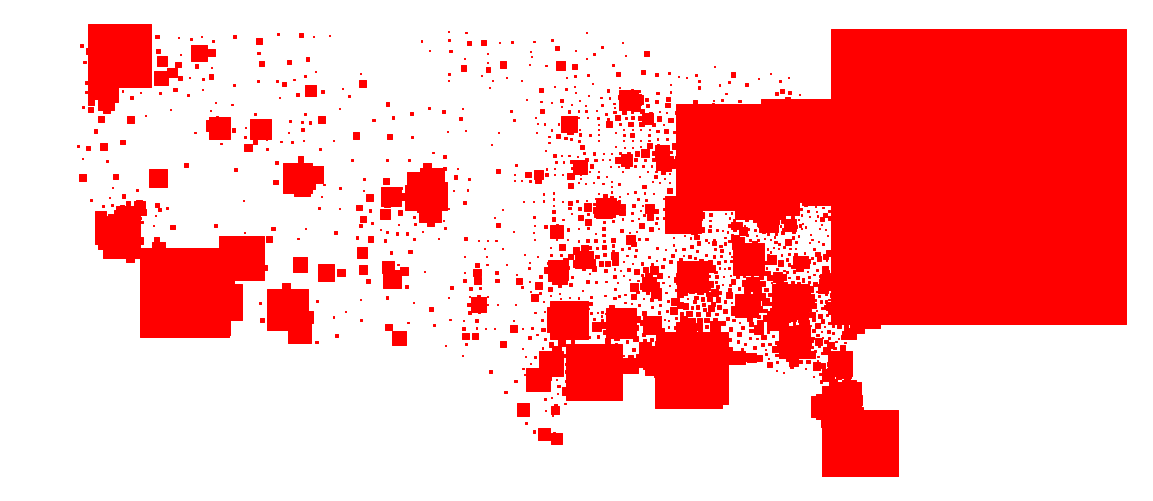

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

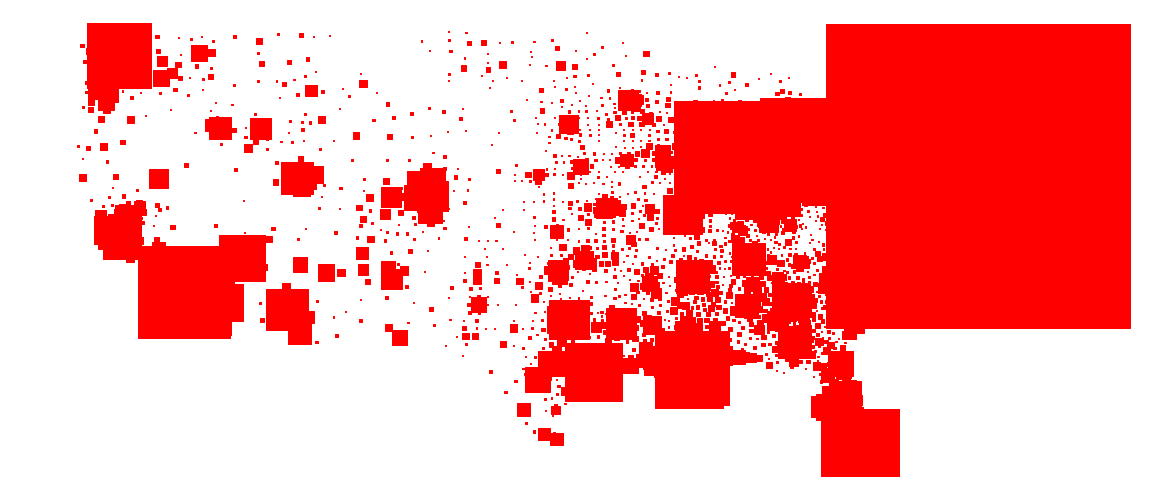

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

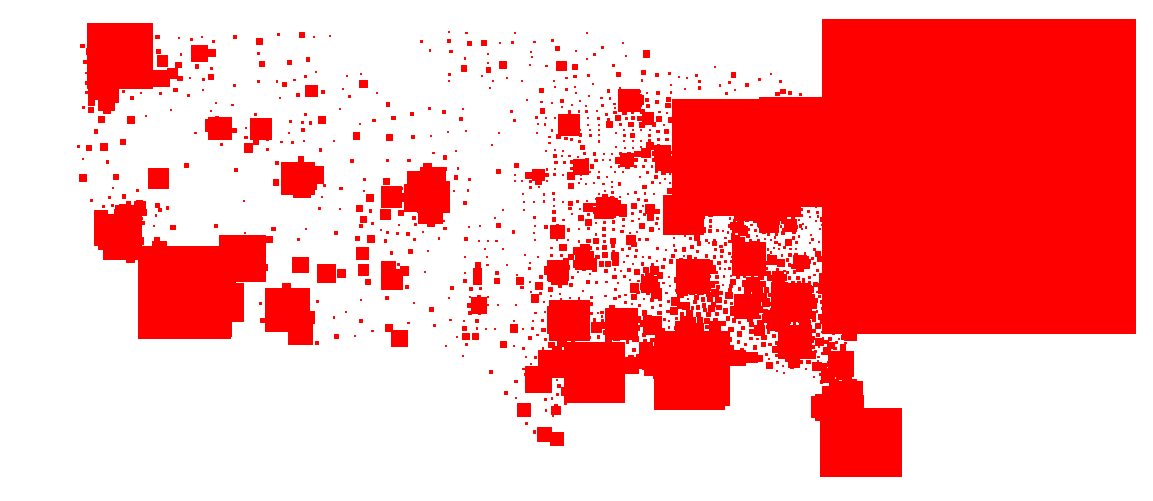

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

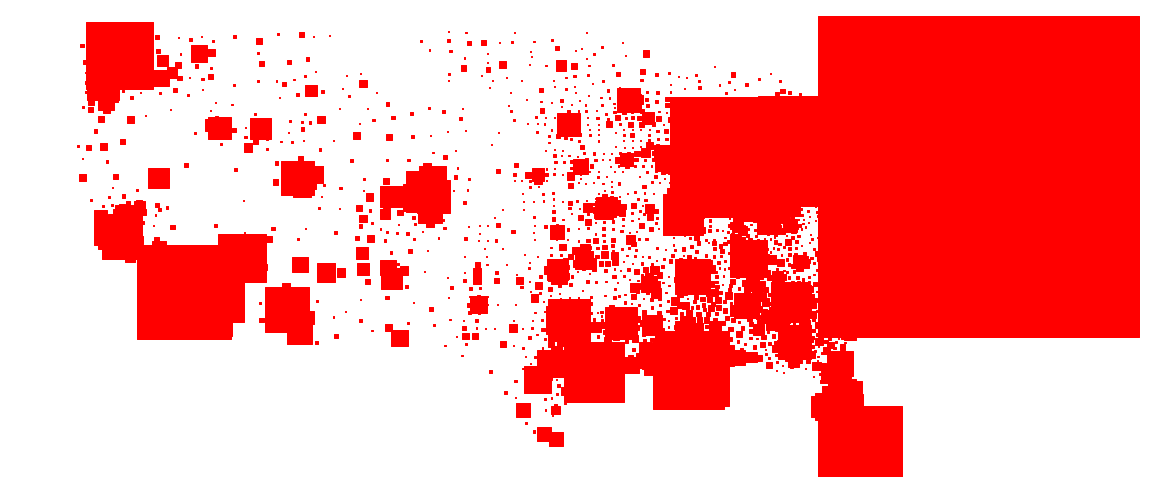

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

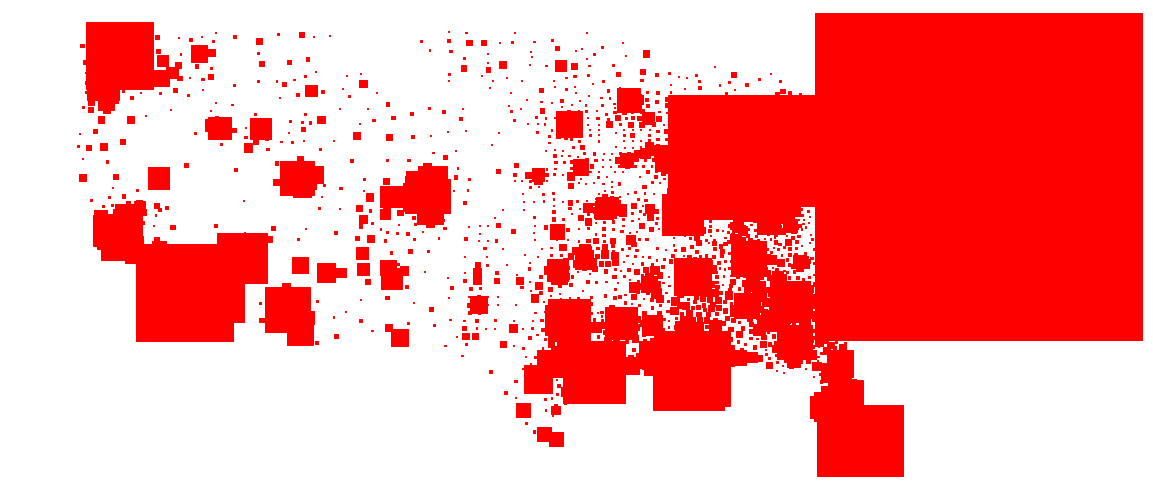

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

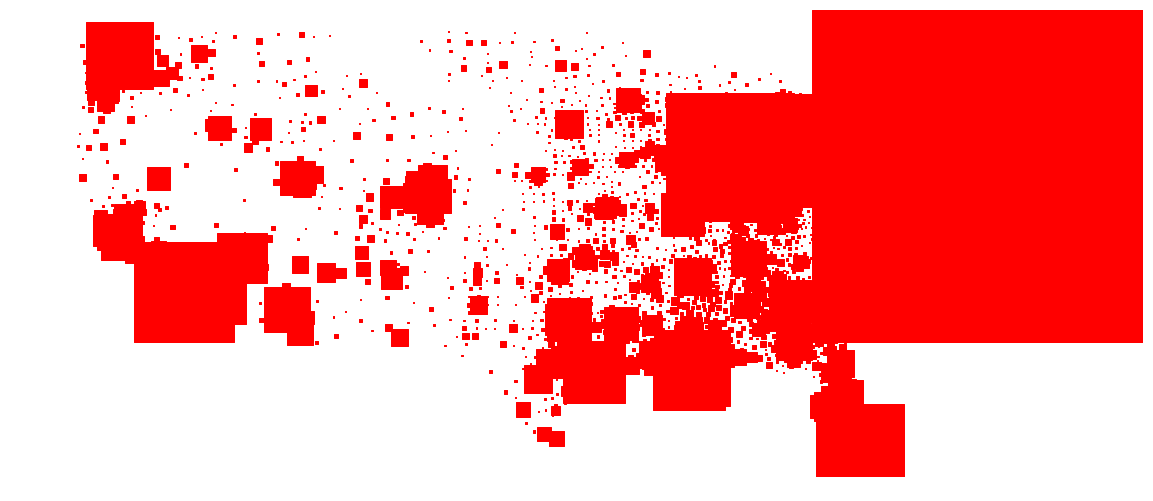

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

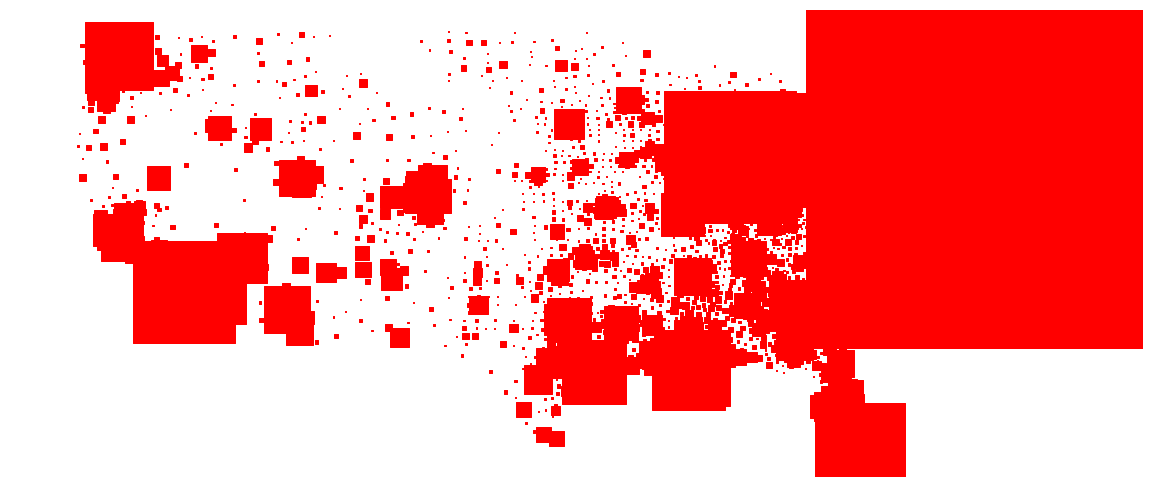

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

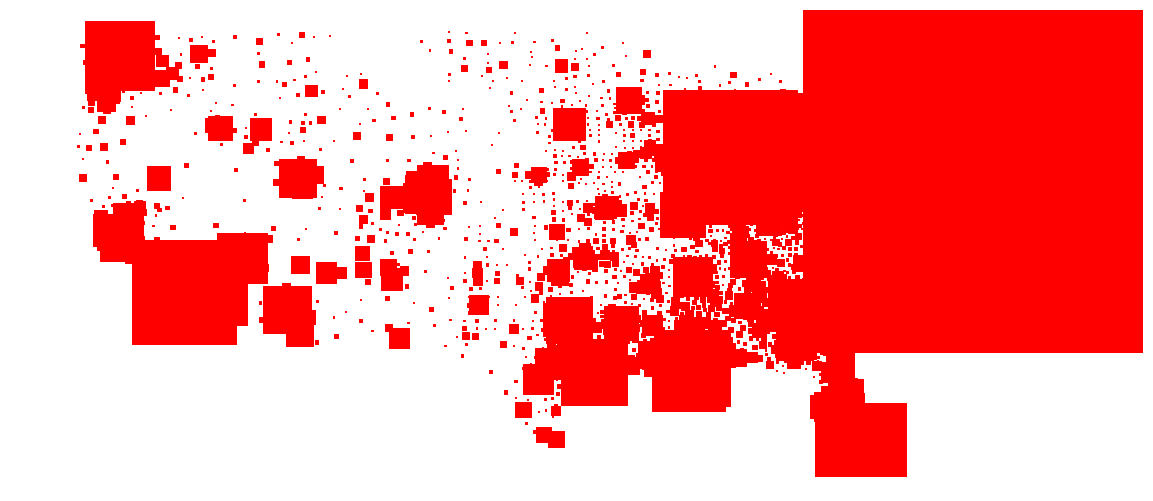

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

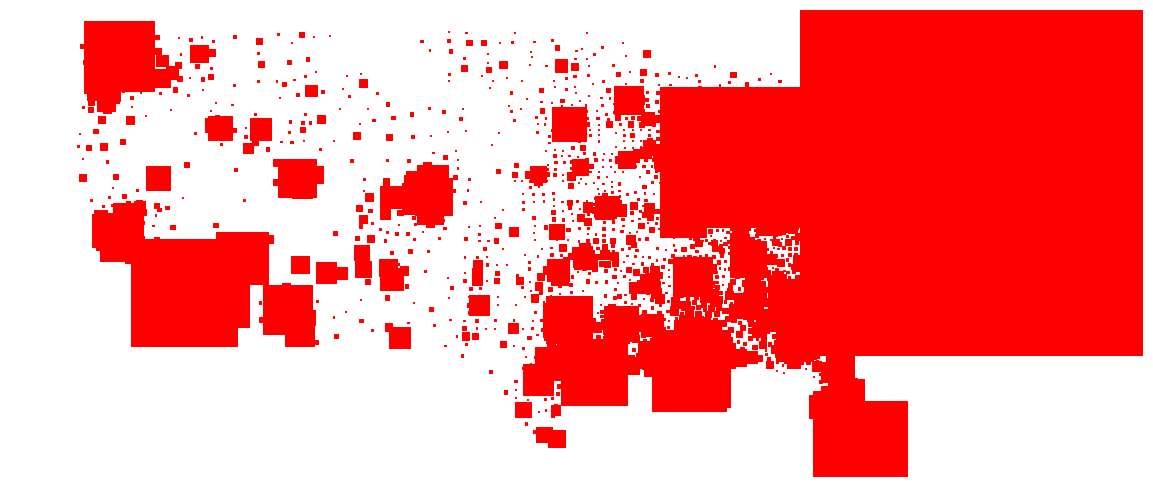

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

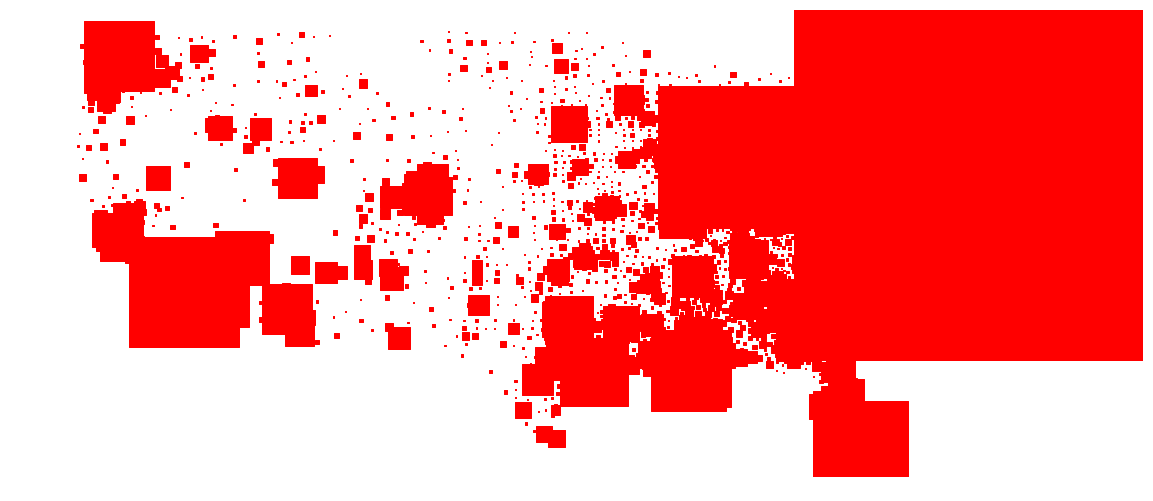

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

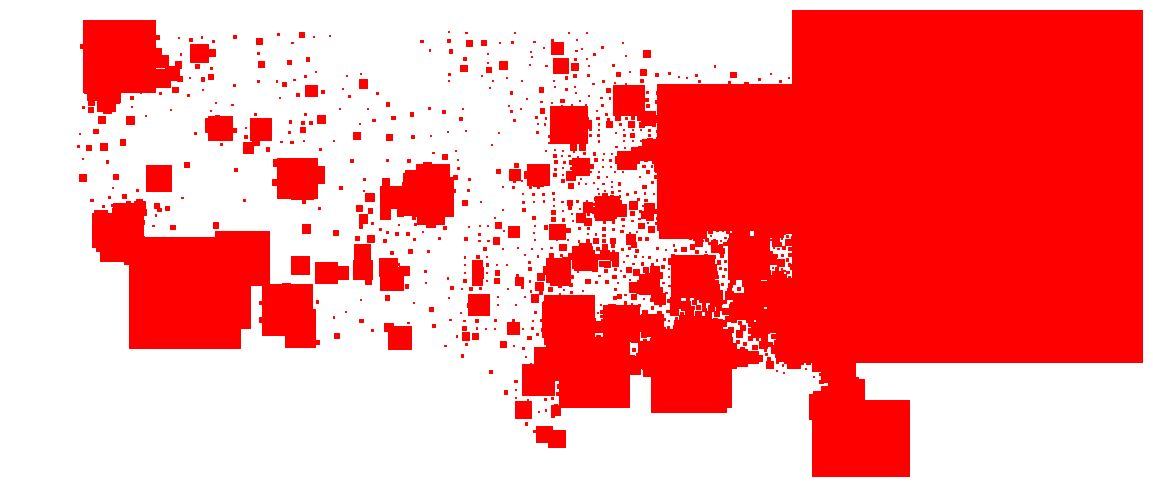

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

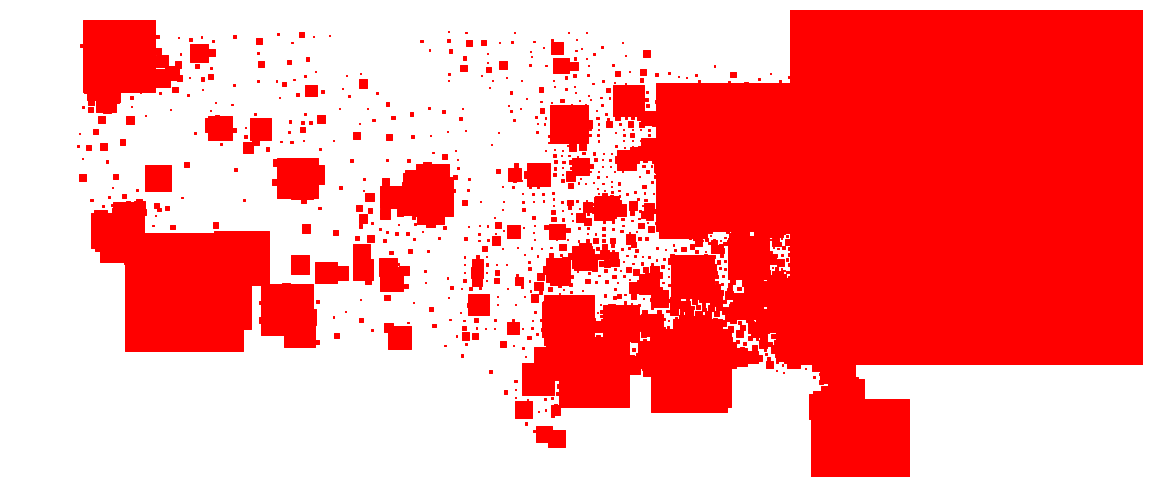

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

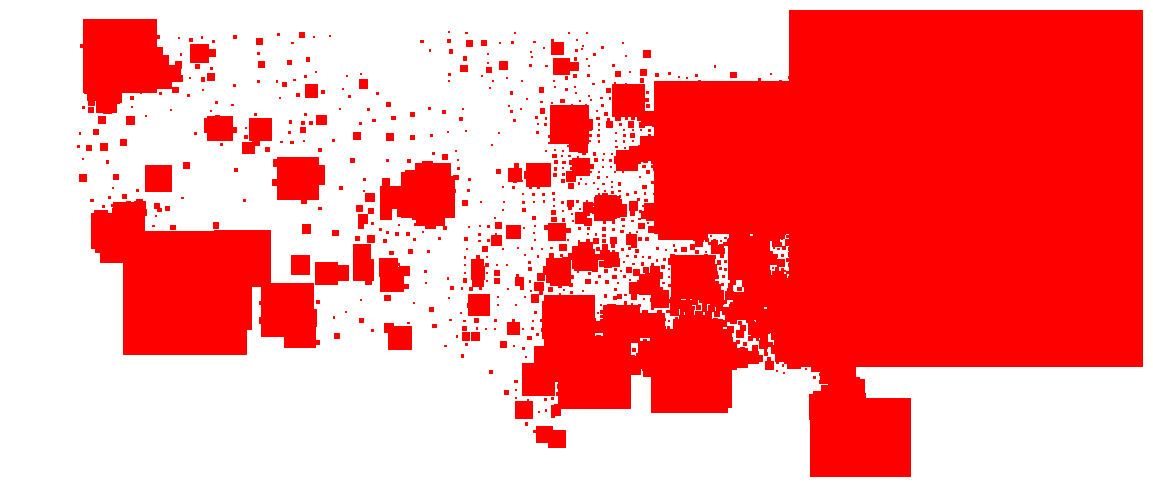

<Figure size 7200x7200 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

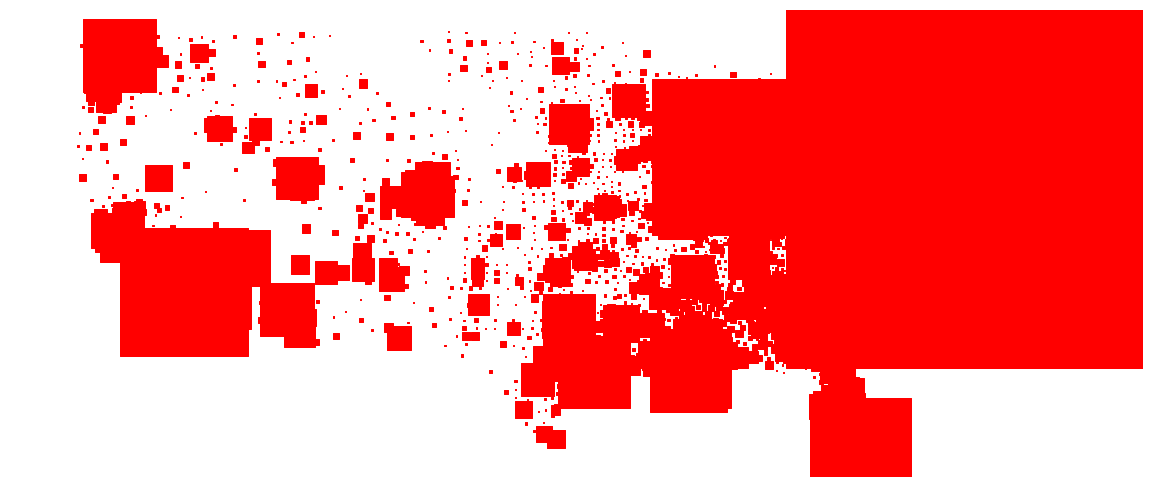

<Figure size 7200x7200 with 0 Axes>

AttributeError: 'Point' object has no attribute 'sqrt'

<Figure size 1440x720 with 0 Axes>

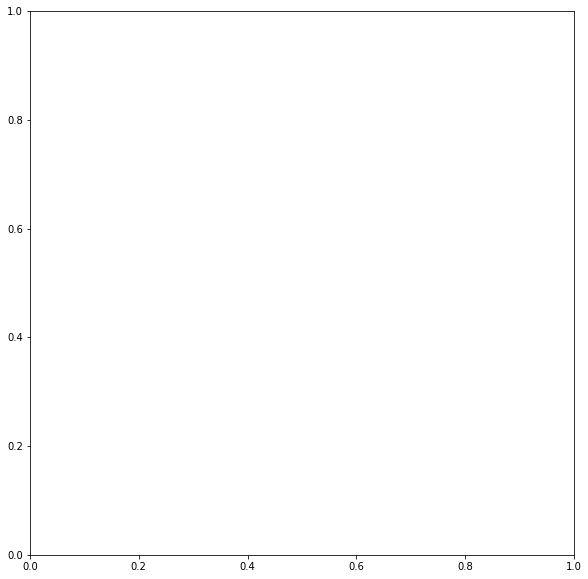

In [96]:
i = 1
first_loc = gdf.columns.get_loc("1/22/20")
for col in gdf.columns[first_loc:]:
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world[world.continent == 'United States'].plot(color='white', edgecolor='white')
    file_name = str(i) + '.png'
    limit_columns = gdf[['Admin2','Province_State','Lat','Long_',col]]
    filter_columns = limit_columns[limit_columns[col] != 0]
    lat_long = geopandas.GeoDataFrame(filter_columns,
                          geometry=geopandas.points_from_xy(filter_columns.Long_, filter_columns.Lat))
    lat_long.plot(ax=ax, color='red', marker='s',markersize=lat_long[col])
    plt.axis('off')
    plt.savefig(file_name,dpi=100)
    plt.figure(figsize=(100,100))
    plt.show() 
    plt.clf()
    i +=1
    
    
  

%matplotlib --list

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html

https://stackoverflow.com/a/5638626/8928529

text(1,1,'foobar',rasterized=True)

